# Demand-Forecasting of Store Sales

# Background Information

**In this assignment, we are given 5 years of store-item sales data with the following attributes:**

****
**Data Fields :**

**date - Date of the sale data. There are no holiday effects or store closures.**

**store - Store ID**

**item - Item ID**

**sales - Number of items sold at a particular store on a particular date."**

** **
**We are asked to predict 3 months of sales for the items at the 10 different stores.**

**Just by looking at the data fields and the task given to us (short term forecast for 3 months), we decide to use ARIMA for this assignemnt. We use ARIMA because it is a fairly simplistic model that can capture small time series very well in the short term, and also because the data fields of the dataset are simpler than those of a complex dataset.**

**ARIMA is a regression model that comprises of three components: autoregression (AR), differencing/integration (I) and moving average (MA). In econometrics terms, autoregression is the regression of a time series on itself with a time lag. The autoregressive model is shown as follows:**

$Y_{t}$ = f($Y_{t-1}$,$Y_{t-2}$,$Y_{t-3}$...)
   
$Y_{t}$ = $β_{0}$ + $β_{1}$$Y_{1}$ + $β_{2}$$Y_{2}$ + $β_{3}$$Y_{3}$ + ... + $ε_{1}$ + $ε_{2}$ + $ε_{3}$ + ...
    
**where $Y_{t}$ is sales at time $t$ according to our data, the $β$ coefficients are the coefficients of regression for each term and the $ε$ are the error terms at each time interval.**

**Moving average is the regression model in which the time series is regressed on the error terms of the autoregressive model at different parameters. The moving average model is shown as follows:**

$Y_{t}$ = f($ε_{t}$,$ε_{t-1}$,$ε_{t-2}$...)
   
$Y_{t}$ = $β$ + $ε_{t}$ + $θ_{1}$$ε_{t-1}$ + $θ_{2}$$ε_{t-2}$ + $θ_{3}$$ε_{t-3}$ + ... 

**where $θ$ coefficients are the coefficients of the error terms at each time interval.** 

**Together, autoregression and moving average combined together form the ARMA model ( AR + MA = ARMA ).** 

$Y_{t}$ = $β_{0}$ + $β_{1}$$Y_{1}$ + $β_{2}$$Y_{2}$ + $β_{3}$$Y_{3}$ + ... + $ε_{t}$ + $θ_{1}$$ε_{t-1}$ + $θ_{2}$$ε_{t-2}$ + $θ_{3}$$ε_{t-3}$ + ...
    
**However, the model can not be good if our time series is not stationary.**

**What is stationarity?**

**A series is said to be "strictly stationary* if its mean, variance and covariance are constant over time, and are invariant of time. A series which is not stationary, can be made stationary by differencing. This is where the differencing comes in our ARMA model, to make the ARIMA model ( AR + I + MA = ARIMA ). Differencing means that we subtract each value in our time series from its successive value and create a new series with the resulting values. The first value of the new series is null because the first value can not be subtracted with any value because there exists no value prior to it. So, we get rid of the null value, resulting in a series with one length smaller than the original time series.**

**The ARIMA model has parameters (p,d,q) that correspond to AR, MA and I, respectively. If p = 1, we take the AR model with one previous value in time:**

$Y_{t}$ = $β_{0}$ + $β_{1}$$Y_{1}$ $ε_{t}$
    
**Likewise, if q = 1, we take the MA model with one previous value in time:**

$Y_{t}$ = $β$ + $ε_{t}$ + $θ_{1}$$ε_{t-1}$ 

**Similarly, if d = 1, we difference our time series once.**

**These three parameters (p,d,q) decide the accuracy of our ARIMA model. So, we have to find out the best values for these parameters when making our model.**

****

# Exploratory Data Analysis

**Now that we have provided some background information, let's get started with some exploratory data analysis. First, we parsed the data and visualized it.**

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
#Loading data :
train = pd.read_csv('Demand-Forecasting/train.csv', parse_dates=['date'],index_col= ['date'])
print('Train shape:{}'.format(train.shape))
print('\nTop 10 rows\n'+ str(train.head(10)))
print('\n1826th row onwards\n'+str(train.iloc[1826:1835,]))
print('\n18260th row onwards\n'+str(train.iloc[18260:18269,]))

Train shape:(913000, 3)

Top 10 rows
            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
2013-01-06      1     1     12
2013-01-07      1     1     10
2013-01-08      1     1      9
2013-01-09      1     1     12
2013-01-10      1     1      9

1826th row onwards
            store  item  sales
date                          
2013-01-01      2     1     12
2013-01-02      2     1     16
2013-01-03      2     1     16
2013-01-04      2     1     20
2013-01-05      2     1     16
2013-01-06      2     1     18
2013-01-07      2     1     12
2013-01-08      2     1     11
2013-01-09      2     1     16

18260th row onwards
            store  item  sales
date                          
2013-01-01      1     2     33
2013-01-02      1     2     43
2013-01-03      1     2     23
2013-01-04      1     2     18
2013-01-05      1     2

**Looking at the rows of the data, we can see that the dataset contains data for each store and each item in specific rows. This can cause problems because our dataset is not homogenous in the sense that it should be formatted by store or formatted by item.** 

**Modelling 10 stores is a more suitable job than modelling 50 items. And since we want to find the demand, it will make sense to get the demand for the stores based on the assumption that the business process at the store level could be improved by that. Having a demand for a specific item might help us to see which items are in demand, but that will be an analysis that will be much more time and power consuming, considering the complexity of the model. That being said, it is still possible (but not preferred) to do it. So, based on our preference, we format the data by store and get daily sales per store (with all items).**

In [3]:
# Number of stores
numStores = len(np.unique(train.store))
numStores

10

In [4]:
#Visualizing item numbers
items = np.unique(train.item.values)
items

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [5]:
#Modify data by overall store sales
sales = pd.DataFrame()
dates = []
for num in range(1,numStores+1):
    subset = train[train.store==num].resample('D').sum()
    name = 'Store '+str(num)
    sales[name] = subset.sales.values
    dates = subset.index.values
sales['date'] = dates
sales = sales.set_index('date')
sales.head()

Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7  \
date                                                                        
2013-01-01     1316     1742     1588     1423     1032     1099      964   
2013-01-02     1264     1808     1538     1432      997     1023      944   
2013-01-03     1305     1887     1635     1534     1130     1149      966   
2013-01-04     1452     1983     1741     1685     1258     1201     1040   
2013-01-05     1499     2087     1887     1649     1154     1286     1131   

            Store 8  Store 9  Store 10  
date                                    
2013-01-01     1628     1383      1521  
2013-01-02     1687     1455      1530  
2013-01-03     1736     1492      1654  
2013-01-04     1966     1612      1739  
2013-01-05     2005     1698      1841

In [6]:
#List of the stores for ease in future
storeList = sales.columns.values
storeList

array(['Store 1', 'Store 2', 'Store 3', 'Store 4', 'Store 5', 'Store 6',
       'Store 7', 'Store 8', 'Store 9', 'Store 10'], dtype=object)

In [7]:
#Modify data by month instead of day
salesMonthly = sales.resample('M').sum()
salesMonthly.head()

Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7  \
date                                                                        
2013-01-31    41077    58520    51972    47720    34405    34944    31508   
2013-02-28    41306    59384    52081    48806    34918    34808    32021   
2013-03-31    55827    79609    70069    64522    47082    47214    42932   
2013-04-30    61523    87987    77767    71801    51944    51647    47464   
2013-05-31    69272    98361    86664    80487    57794    57732    52876   

            Store 8  Store 9  Store 10  
date                                    
2013-01-31    56043    47620     51095  
2013-02-28    56279    48190     51624  
2013-03-31    75889    64989     69249  
2013-04-30    83568    71782     76791  
2013-05-31    93753    80093     86210

**After obtaining the data in the required format, we want to see if it's stationary. One rule of stationarity is that if we take two subsets of a dataset at different time periods, then their overall mean and standard deviation should be roughly the same. So, we took two different subsets of the data (years 2013 and 2014) and compared their means and standard deviations.**

In [8]:
#Check data stats
salesMonthly.describe()

Store 1        Store 2        Store 3        Store 4  \
count      60.000000      60.000000      60.000000      60.000000   
mean    71926.716667  102002.133333   90585.733333   83543.983333   
std     15665.316049   22154.180550   19701.272282   18134.660054   
min     41077.000000   58520.000000   51972.000000   47720.000000   
25%     59967.000000   84877.500000   75221.500000   69634.000000   
50%     72513.000000  102531.500000   91099.500000   83806.000000   
75%     83462.250000  118364.500000  104701.000000   96884.500000   
max    106187.000000  150105.000000  133369.000000  123346.000000   

            Store 5       Store 6       Store 7        Store 8        Store 9  \
count     60.000000     60.000000     60.000000      60.000000      60.000000   
mean   60516.933333  60461.166667  55333.483333   97602.816667   83766.266667   
std    13190.521987  13148.967373  12032.357471   21202.275285   18258.142962   
min    34405.000000  34808.000000  31508.000000   56043.000000   47620.000000   
25%    50368.000000  50452.500000  46048.000000   81416.500000   69423.250000   
50%    61030.000000  60787.000000  55507.000000   98184.500000   84213.000000   
75%    69992.250000  70001.000000  63952.000000  113315.000000   97217.500000   
max    89217.000000  89642.000000  81557.000000  143308.000000  123024.000000   

            Store 10  
count      60.000000  
mean    89335.966667  
std     19433.108821  
min     51095.000000  
25%     74296.750000  
50%     90006.500000  
75%    103722.750000  
max    131638.000000

In [9]:
#Creating subsets for years 2013 qnd 2014
sales2013 = salesMonthly.loc['2013-01-31':'2014-01-01']

sales2014 = salesMonthly.loc['2014-01-31':'2015-01-01']

In [10]:
#Subset for the year 2013
sales2013

Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7  \
date                                                                        
2013-01-31    41077    58520    51972    47720    34405    34944    31508   
2013-02-28    41306    59384    52081    48806    34918    34808    32021   
2013-03-31    55827    79609    70069    64522    47082    47214    42932   
2013-04-30    61523    87987    77767    71801    51944    51647    47464   
2013-05-31    69272    98361    86664    80487    57794    57732    52876   
2013-06-30    71531   102158    90659    83900    60804    60712    55327   
2013-07-31    77527   109645    97233    90077    65075    64973    59550   
2013-08-31    69745    97992    87559    80435    58368    58443    53456   
2013-09-30    62408    88673    78653    72243    52544    52476    48024   
2013-10-31    59130    84093    74593    68884    49876    50217    45922   
2013-11-30    62465    88874    78754    73146    52454    52959    47986   
2013-12-31    46029    64942    57932    53038    38519    38248    35157   

            Store 8  Store 9  Store 10  
date                                    
2013-01-31    56043    47620     51095  
2013-02-28    56279    48190     51624  
2013-03-31    75889    64989     69249  
2013-04-30    83568    71782     76791  
2013-05-31    93753    80093     86210  
2013-06-30    97797    83420     89289  
2013-07-31   105040    90194     96608  
2013-08-31    94052    80650     86061  
2013-09-30    84722    72873     77291  
2013-10-31    80809    69193     73870  
2013-11-30    84828    73173     78004  
2013-12-31    61875    53611     57256

In [11]:
#Subset for the year 2014
sales2014

Store 1  Store 2  Store 3  Store 4  Store 5  Store 6  Store 7  \
date                                                                        
2014-01-31    47788    67315    59674    55657    39893    40107    36891   
2014-02-28    47838    67605    60408    55433    40105    40285    36698   
2014-03-31    63729    90547    80280    73721    53527    53649    49263   
2014-04-30    71149   101464    90321    82768    60359    59942    55026   
2014-05-31    80108   113269   100332    92772    67257    67464    61574   
2014-06-30    82196   116490   103340    95054    69232    68874    63249   
2014-07-31    89389   127024   112166   103734    75088    75164    68478   
2014-08-31    79794   113216   101012    93136    67413    67474    61769   
2014-09-30    71134   100340    89139    82594    59706    59764    54286   
2014-10-31    68740    97733    86474    80049    57884    57590    53004   
2014-11-30    72506   102805    91540    83712    61256    60548    55569   
2014-12-31    52415    73989    65834    60575    43879    44353    40171   

            Store 8  Store 9  Store 10  
date                                    
2014-01-31    64528    55410     58724  
2014-02-28    65163    55917     59665  
2014-03-31    86233    74326     79026  
2014-04-30    96410    82704     88771  
2014-05-31   108324    93032     98745  
2014-06-30   110975    95704    101728  
2014-07-31   121926   104122    111919  
2014-08-31   108946    93296     99540  
2014-09-30    96793    82839     88529  
2014-10-31    93060    79265     85084  
2014-11-30    98548    84336     89963  
2014-12-31    70991    60828     65013

In [12]:
#Get the stats of the two subsets and check their difference in mean and standard deviation
stats2013 = sales2013.describe()
stats2014 = sales2014.describe()
differenceMean = stats2014.iloc[1] - stats2013.iloc[1]
differenceMeanPerc = (stats2014.iloc[1] - stats2013.iloc[1])/stats2013.iloc[1]*100
differenceStdPerc = (stats2014.iloc[2] - stats2013.iloc[2])/stats2013.iloc[1]*100

In [13]:
#Stats for the year 2013
stats2013

Store 1        Store 2      Store 3       Store 4       Store 5  \
count     12.000000      12.000000     12.00000     12.000000     12.000000   
mean   59820.000000   85019.833333  75328.00000  69588.250000  50315.250000   
std    11892.722572   16722.538894  14888.85041  13803.317296  10003.847934   
min    41077.000000   58520.000000  51972.00000  47720.000000  34405.000000   
25%    53377.500000   75942.250000  67034.75000  61651.000000  44941.250000   
50%    61965.500000   88330.000000  78210.00000  72022.000000  52199.000000   
75%    69390.250000   98084.250000  86887.75000  80448.000000  57937.500000   
max    77527.000000  109645.000000  97233.00000  90077.000000  65075.000000   

            Store 6       Store 7       Store 8       Store 9      Store 10  
count     12.000000     12.000000      12.00000     12.000000     12.000000  
mean   50364.416667  46018.583333   81221.25000  69649.000000  74445.666667  
std     9951.744511   9125.720529   16106.10475  13797.580638  14770.889050  
min    34808.000000  31508.000000   56043.00000  47620.000000  51095.000000  
25%    44972.500000  40988.250000   72385.50000  62144.500000  66250.750000  
50%    52061.500000  47725.000000   84145.00000  72327.500000  77041.000000  
75%    57909.750000  53021.000000   93827.75000  80232.250000  86098.250000  
max    64973.000000  59550.000000  105040.00000  90194.000000  96608.000000

In [14]:
#Stats for the year 2014
stats2014

Store 1        Store 2        Store 3        Store 4  \
count     12.000000      12.000000      12.000000      12.000000   
mean   68898.833333   97649.750000   86710.000000   79933.750000   
std    13657.424447   19506.652437   17206.995559   15859.035544   
min    47788.000000   67315.000000   59674.000000   55433.000000   
25%    60900.500000   86407.500000   76668.500000   70434.500000   
50%    71141.500000  100902.000000   89730.000000   82681.000000   
75%    79872.500000  113229.250000  100502.000000   92863.000000   
max    89389.000000  127024.000000  112166.000000  103734.000000   

            Store 5       Store 6       Store 7        Store 8        Store 9  \
count     12.000000     12.000000     12.000000      12.000000      12.000000   
mean   57966.583333  57934.500000  52998.166667   93491.416667   80148.250000   
std    11595.594535  11460.664779  10493.205705   18631.734133   15937.294484   
min    39893.000000  40107.000000  36698.000000   64528.000000   55410.000000   
25%    51115.000000  51325.000000  46990.000000   82422.500000   70951.500000   
50%    60032.500000  59853.000000  54656.000000   96601.500000   82771.500000   
75%    67296.000000  67466.500000  61622.750000  108479.500000   93098.000000   
max    75088.000000  75164.000000  68478.000000  121926.000000  104122.000000   

            Store 10  
count      12.000000  
mean    85558.916667  
std     17108.792181  
min     58724.000000  
25%     75522.750000  
50%     88650.000000  
75%     98943.750000  
max    111919.000000

In [15]:
#Difference in mean in percentage for all the stores
differenceMeanPerc

Store 1     15.176920
Store 2     14.855259
Store 3     15.109919
Store 4     14.866734
Store 5     15.206788
Store 6     15.030619
Store 7     15.166880
Store 8     15.107089
Store 9     15.074517
Store 10    14.928001
Name: mean, dtype: float64

In [16]:
#Difference in standard deviation in percentage for all the stores
differenceStdPerc

Store 1     2.950020
Store 2     3.274664
Store 3     3.077402
Store 4     2.954117
Store 5     3.163547
Store 6     2.996005
Store 7     2.971593
Store 8     3.109567
Store 9     3.072139
Store 10    3.140415
dtype: float64

**So, our comparison shows that from year 2013 to year 2014, there is a rise of approximately 15% in mean for all the stores and a 3% rise in standard deviation for all stores. This suggests that the mean and standard deviation are not constant throughout time, meaning that our data could be nonstationary. So, we decided to visualize our data and look for trend and seasonality since they are good deciding attributes to evaluate whether the data is stationary or not.**

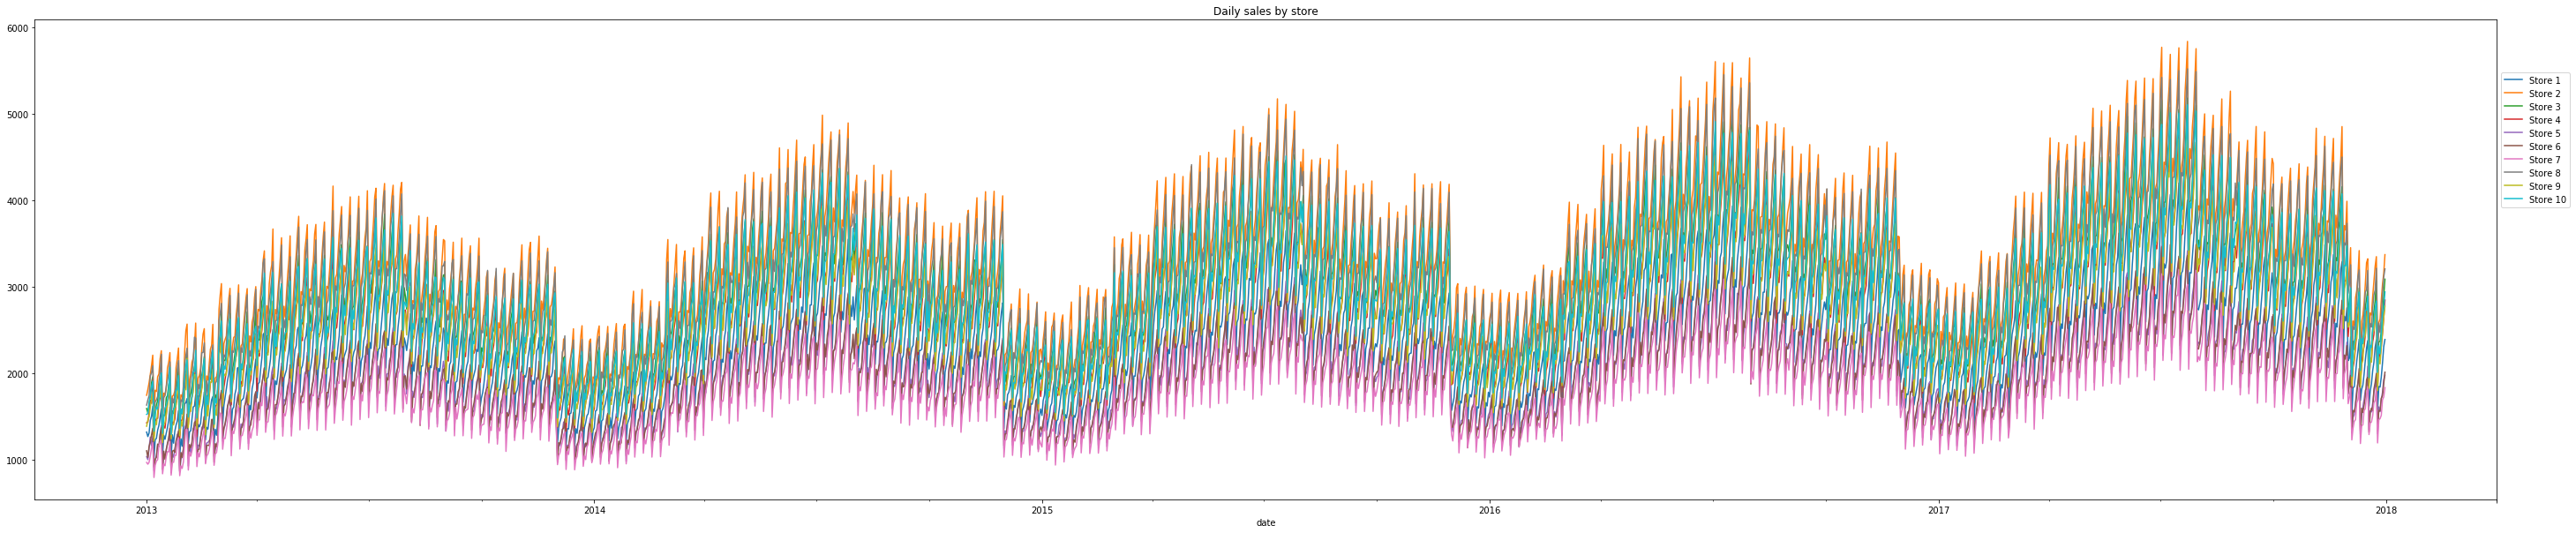

In [17]:
#Data Visualization at the day level
plt.rcParams['figure.figsize'] = [50, 10]

sales.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Daily sales by store")
plt.show()

**We visualized the data at the day level and saw that there was an obvious seasonality in the data. We could also see a general trend towards the number of sales increasing successively each year for each of the stores. However, the trend was minimal and it was not clear if it was significant. So, we decided to work on the data at a monthly level for a better understanding and easier handling of the data.**

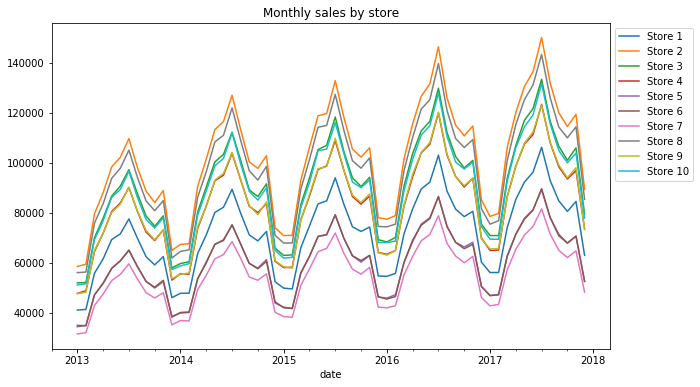

In [18]:
#Data Visualization at the month level
plt.rcParams['figure.figsize'] = [10, 6]

salesMonthly.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Monthly sales by store")
plt.show()

**Visualizing the sales data at the monthly level was very convenient because the plots were clearer and more distinguishable.**

****

# Data Transformation and stationarity checks before modeling 

**Before we created our model, we had to make sure that our data was stationary, meaning that it had a constant mean over time and did not have a trend and seasonality. This is important for an accurate model.**

**From the monthly plots, we concluded that there was an obvious seasonality in the data. We also saw a similar trend towards the number of sales increasing successively each year for each of the stores. However, again, since time series models can work with minimal trend, we wanted to find out if the trend was significant enough to consider the dataset nonstationary.**

**Moving on, we decided to calculate some rolling statistics for the data. We wanted to calculate the moving average (rolling mean) and the moving standard deviation (rolling standard deviation) so that we could find out whether the mean and standard deviation of the data varied with time, and hence was a function of time. Since we had already seen from our visualizations and basic stats that all the stores follow the same distribution (with different values however), we can prepare tests for stationarity for one store, and can hope to apply the same algorithm to the other stores. So, in developing our algorithm, we choose Store 1 from now on.**

**For more accurate evaluation, moving forward, we used two statistical tests, Adjusted Dickey-Fuller test and KPSS test, to check for linear stationarity and trend stationarity in the data, respectively. The former focuses on stationarity based on the linear aspects of the data (is the data changing linearly or not and does it have a unit root/random walk with drift). The latter focuses on the trend aspects of the data (which may or may not be linear or may be polynomial).**

**We also decomposed the data to get visualizations of the trend, seasonality and residuals so that we could make a better assessment of it's stationarity by looking at the visualizations.**

In [19]:
#Calculate rolling statistics
def calcRollStats(df,val):
    #determining rolling statistics
    rollmean = df[val].rolling(window = 12).mean()
    rollstd = df[val].rolling(window = 12).std()
    return rollmean,rollstd

In [20]:
#Check for stationarity with the Dickey-Fuller test
def ADfullerTest(df,val):
    #Performing Dickey-Fuller Test
    print('\n\nResults from the Dickey-Fuller Test for ' + val)
    dftest = adfuller(df[val], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

    if(max(dfoutput[[0,6]]))!=dfoutput[0] and dfoutput[1]<=0.5:
            print('\nThe dataset is linearly stationary')
    else:
        print('\nThe dataset is not linearly stationary')

In [21]:
#Check for stationarity with KPSS test
from statsmodels.tsa.stattools import kpss

def kpssTest(df,val):
    print('\n\nResults from the KPSS Test for ' + val)
    kpssTest = kpss(df[val], regression='c')
    kpssOutput = pd.Series(kpssTest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpssTest[3].items():
        kpssOutput['Critical Value (%s)'%key] = value
    print (kpssOutput)
    
    if(max(kpssOutput[[0,4]]))!=kpssOutput[0] and kpssOutput[1]<=0.5:
            print('\nThe dataset is not trend stationary')
    else:
        print('\n The dataset is trend stationary')

In [22]:
#Plot basic stats of rolling mean and rolling std for the data
def plotStats(df,val):
    print('\n\nStationarity stats of ' + val)
    rollmean,rollstd = calcRollStats(df,val)
    orig = plt.plot(df[val], color = 'blue',label = 'Original')
    mean = plt.plot(rollmean, color = 'red',label = 'Rolling Mean')
    std = plt.plot(rollstd, color = 'black',label = 'Rolling Std')

    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation for '+ val)
    plt.show(block = False)

    ADfullerTest(df,val)
    
    kpssTest(df,val)

In [23]:
#Get seasonality, trend and residuals of the data by decomposing it
from statsmodels.tsa.seasonal import seasonal_decompose
def seasonalPlots(df,val):
    decomposition = seasonal_decompose(df[val])

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    print('\nTrend, seasonality and residual plots for ' + val)
    
    plt.subplot(411)
    plt.plot(df[val], label = 'Original')
    plt.title('Original')
    plt.legend(loc = 'best')
    
    plt.subplot(412)
    plt.plot(trend, label = 'Trend')
    plt.title('Trend')
    plt.legend(loc = 'best')
    
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonality')
    plt.title('Seasonality')
    plt.legend(loc = 'best')
    
    plt.subplot(414)
    plt.plot(residual, label = 'Residuals')
    plt.tight_layout()
    plt.title('Residuals')
    plt.legend(loc = 'best')
    
    plt.show(block = False)



Stationarity stats of Store 1


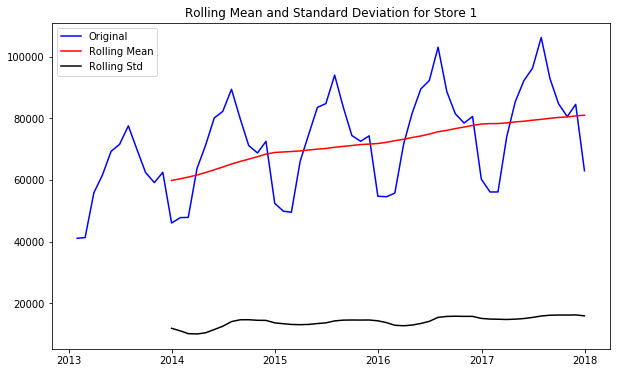



Results from the Dickey-Fuller Test for Store 1
Test Statistic                 -4.995500
p-value                         0.000023
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64

The dataset is linearly stationary


Results from the KPSS Test for Store 1
Test Statistic            0.631050
p-value                   0.019814
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

 The dataset is trend stationary


In [24]:
#Getting the stats visualizations for Store 1
plt.rcParams['figure.figsize'] = [10, 6]
plotStats(salesMonthly,storeList[0])


Trend, seasonality and residual plots for Store 1


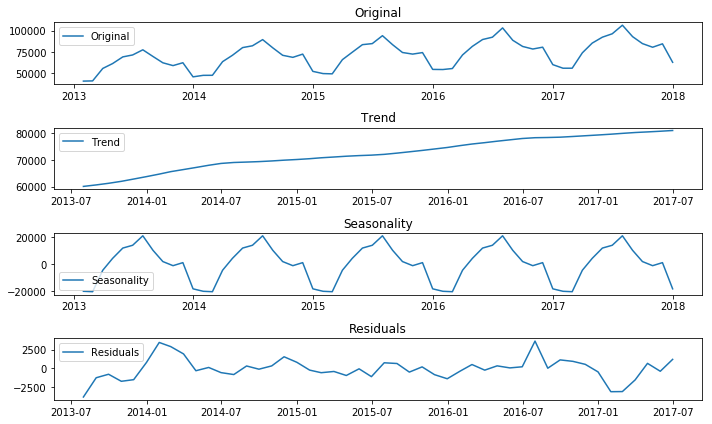

In [25]:
#Trend, seasonality and residual visualizations for Store 1
seasonalPlots(salesMonthly,storeList[0])

**Looking at the rolling stats visualizations, we can see that the rolling mean of the data is increasing with time. Likewise, the rolling standard deviation is increasing with time. Hence, the data is not stationary. The adjusted Dickey-Fuller test shows that the data is linearly stationary. It means that the data does not have a unit root/random walk with drift and that it does not have elements that are completely random and fall out of the distribition. The KPSS test shows us that the data is trend stationary, meaning that in case of a shock, the trend of the data will not be affected because there won't be a random walk with drift to randomly affect the trend. This means that even though the data isn't stationary, its trend is and is not susceptible to change in a shock (due to market crash, economic change, product price change e.t.c).**

**Looking at the plots for the trend, seasonality and residuals, we can get a better understanding of the stationarity of the data. We can see that the trend is increasing within a range of 20000, which is a big number considering the irregularities it can cause to our model. The seasonality plot shows a consistent pattern on a yearly basis that is in the range of 5000. We need to eliminate these huge ranges or at least make them smaller in comparison so that our model can be more robust. When we look at the residuals, we see that the overall mean of the residuals is approximately zero because, for the most part, it is dabbling close to zero. This is a good thing because this means that we don't have covariance in the error and that our error is not a function of time and is random, helping our data being stationary and our model having lesser bias. However, there is room for improvement here.**

**So, now, we have established that our data is not stationary. Next, how do we deal with it? How do we get rid or at least minimize the trend and the seasonality in the data? A good way to deal with seasonality and trend is to transform the data. So, that's what we did. We log transformed the data and reassessed its characteristics.**

In [26]:
#Transform data and get rolling mean and rolling std
def logTransformedStats(df):
    #Estimating trend
    df_logScale = np.log(df)
    
    #determining rolling statistics
    movingAverage = df_logScale.rolling(window = 12).mean()

    movingStd = df_logScale.rolling(window = 12).std()
    return df_logScale,movingAverage

In [27]:
#Log transformed data for Store 1
logSalesMonthly,movAvgLogSalesMonthly = logTransformedStats(salesMonthly)
logSalesMonthly.head()

Store 1    Store 2    Store 3    Store 4    Store 5    Store 6  \
date                                                                           
2013-01-31  10.623204  10.977124  10.858460  10.773106  10.445957  10.461502   
2013-02-28  10.628763  10.991780  10.860555  10.795609  10.460758  10.457603   
2013-03-31  10.930013  11.284882  11.157236  11.074762  10.759646  10.762446   
2013-04-30  11.027166  11.384944  11.261472  11.181654  10.857921  10.852187   
2013-05-31  11.145796  11.496400  11.369794  11.295851  10.964640  10.963567   

              Store 7    Store 8    Store 9   Store 10  
date                                                    
2013-01-31  10.357997  10.933875  10.771008  10.841442  
2013-02-28  10.374147  10.938077  10.782907  10.851742  
2013-03-31  10.667373  11.237027  11.081973  11.145464  
2013-04-30  10.767727  11.333416  11.181389  11.248843  
2013-05-31  10.875705  11.448419  11.290944  11.364541

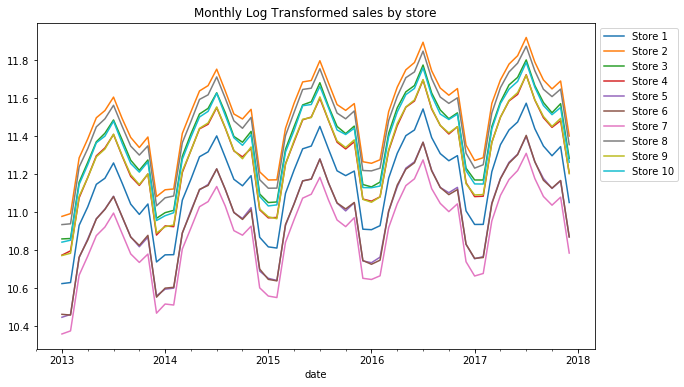

In [28]:
#Transformed Data Visulization at the month level
plt.rcParams['figure.figsize'] = [10, 6]

logSalesMonthly.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Monthly Log Transformed sales by store")
plt.show()

**The log transformed data shows a smaller range of difference between the years because the scale has been made smaller. This helps our model because the distribution and relationship of the data has been captured while the change is at a smaller range. This makes it easier to fit a model properly and to do a better forecast.**



Stationarity stats of Store 1


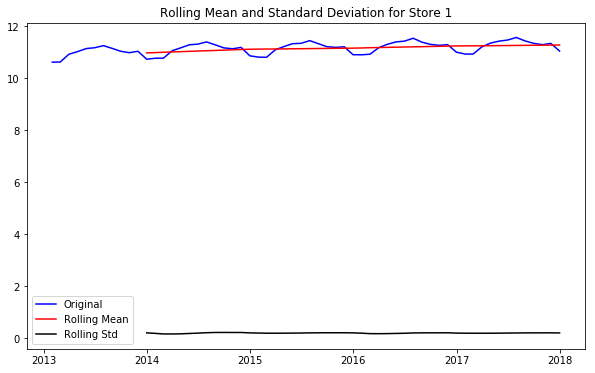



Results from the Dickey-Fuller Test for Store 1
Test Statistic                -6.537706e+00
p-value                        9.516788e-09
#Lags Used                     1.100000e+01
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64

The dataset is linearly stationary


Results from the KPSS Test for Store 1
Test Statistic            0.640553
p-value                   0.018950
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

 The dataset is trend stationary


In [29]:
#Getting the stats visualizations for the transformed data of Store 1
plt.rcParams['figure.figsize'] = [10, 6]
plotStats(logSalesMonthly,storeList[0])


Trend, seasonality and residual plots for Store 1


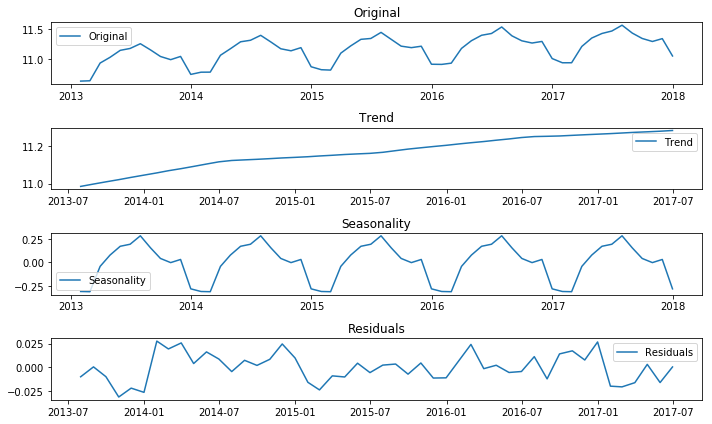

In [30]:
#Trend, seasonality and residual visualizations for transformed data of Store 1
seasonalPlots(logSalesMonthly,storeList[0])

**Looking at the rolling stats visualizations, we can see that the rolling mean of the data is approximately the same overall. Likewise, the rolling standard deviation is approximately the same too. Hence, the data looks stationary. The adjusted Dickey-Fuller test shows that the data is linearly stationary. The KPSS test also shows us that the data is trend stationary.**

**Looking at the plots for the trend, seasonality and residuals, we can get a better understanding of the stationarity of the data. We can see that the trend is increasing within a range of 0.2, which is actually pretty decent. The seasonality plot shows a consistent pattern on a yearly basis that is in the range of 0.5. The trend and seasonality change at a very small level so they can be considered insignificant. When we look at the residuals, we see that the overall mean of the residuals is approximately zero because, for the most part, it is dabbling close to zero. Also, the range is pretty small, 0.05. So, based on these observations, we can consider our transformed data to be pretty stationary or quite close to perfect stationarity.**

**Even though our transformed data is stationary, we wanted to play with some other kinds of data modifications to see whether those other modifications would fare better. One such modification was to subtract the moving average of the transformed data from itself.**  

In [31]:
#Differencing transformed data with moving average for Store 1 
diffLogSalesMonthly = logSalesMonthly - movAvgLogSalesMonthly
#Remove NaN values
diffLogSalesMonthly.dropna(inplace = True)
diffLogSalesMonthly.head()

Store 1   Store 2   Store 3   Store 4   Store 5   Store 6  \
date                                                                     
2013-12-31 -0.242318 -0.250056 -0.243060 -0.251980 -0.247381 -0.255660   
2014-01-31 -0.217426 -0.225835 -0.224950 -0.216603 -0.224665 -0.219684   
2014-02-28 -0.228614 -0.232341 -0.225085 -0.231246 -0.230906 -0.227433   
2014-03-31  0.047173  0.049118  0.047978  0.042760  0.047088  0.048403   
2014-04-30  0.145196  0.151077  0.153356  0.146669  0.154700  0.146905   

             Store 7   Store 8   Store 9  Store 10  
date                                                
2013-12-31 -0.249550 -0.252411 -0.242047 -0.242887  
2014-01-31 -0.214550 -0.222176 -0.221667 -0.229167  
2014-02-28 -0.231156 -0.224598 -0.224951 -0.225334  
2014-03-31  0.051832  0.044915  0.048454  0.044692  
2014-04-30  0.150145  0.144559  0.143458  0.148894

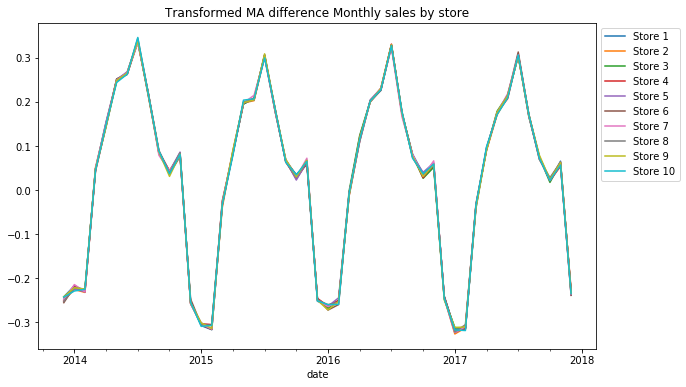

In [32]:
#Transformed differenced with moving average Data Visulization at the month level
plt.rcParams['figure.figsize'] = [10, 6]

diffLogSalesMonthly.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Transformed MA difference Monthly sales by store")
plt.show()



Stationarity stats of Store 1


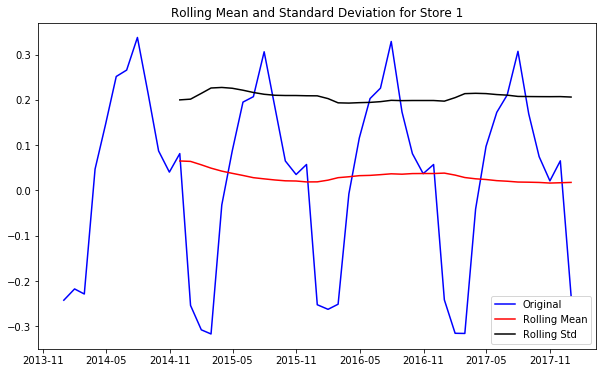



Results from the Dickey-Fuller Test for Store 1
Test Statistic                 -2.864020
p-value                         0.049695
#Lags Used                     11.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64

The dataset is linearly stationary


Results from the KPSS Test for Store 1
Test Statistic            0.370660
p-value                   0.089802
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

The dataset is not trend stationary


In [33]:
#Getting the stats visualizations for the difference of transformed data and it's moving average for Store 1
plotStats(diffLogSalesMonthly,storeList[0])


Trend, seasonality and residual plots for Store 1


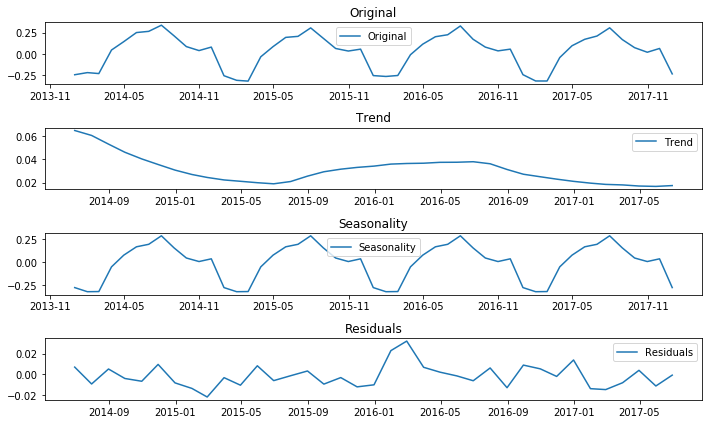

In [34]:
#Trend, seasonality and residual visualizations for the difference of transformed data with its moving average for Store 1
seasonalPlots(diffLogSalesMonthly,storeList[0])

**By looking at the visualizations, we can see that even though seasonality and residual ranges are small and the data is linearly stationary, it is still not trend stationary and its trend visualization shows that the trend has some random changes throughout time. So, this transformation is not better than the original log transformation.**

**The next data transformation that we played with was the difference of log transformed data with its shifted version of degree = 1. We will call it diffShift log transformed data for easier reference.**

In [35]:
#Calculate difference of data with it's shifted version of degree = 1
def diffShift(df):
    df_diffShift = df - df.shift()
    df_diffShift.dropna(inplace = True)
    return df_diffShift

In [36]:
#Diffshift Transformed data for Store 1
diffShiftLogSalesMonthly = diffShift(logSalesMonthly)
diffShiftLogSalesMonthly.head()

Store 1   Store 2   Store 3   Store 4   Store 5   Store 6  \
date                                                                     
2013-02-28  0.005559  0.014656  0.002095  0.022503  0.014801 -0.003900   
2013-03-31  0.301250  0.293102  0.296680  0.279153  0.298888  0.304843   
2013-04-30  0.097153  0.100062  0.104237  0.106892  0.098275  0.089742   
2013-05-31  0.118630  0.111455  0.108321  0.114197  0.106719  0.111380   
2013-06-30  0.032090  0.037876  0.045067  0.041530  0.050771  0.050330   

             Store 7   Store 8   Store 9  Store 10  
date                                                
2013-02-28  0.016150  0.004202  0.011899  0.010300  
2013-03-31  0.293226  0.298950  0.299066  0.293722  
2013-04-30  0.100354  0.096389  0.099416  0.103379  
2013-05-31  0.107978  0.115003  0.109555  0.115699  
2013-06-30  0.045311  0.042230  0.040700  0.035092

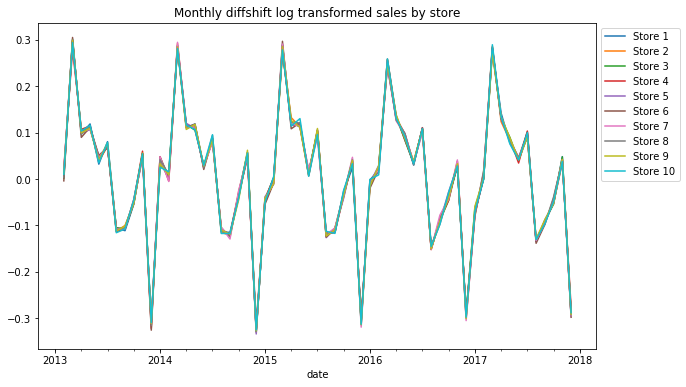

In [37]:
#Transformed diffShifted Data Visualization at the month level
plt.rcParams['figure.figsize'] = [10, 6]

diffShiftLogSalesMonthly.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Monthly diffshift log transformed sales by store")
plt.show()



Stationarity stats of Store 1


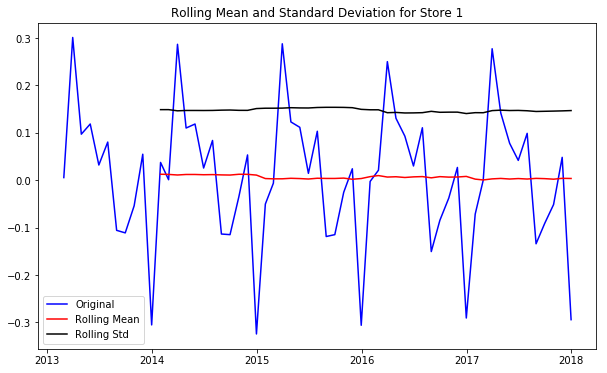



Results from the Dickey-Fuller Test for Store 1
Test Statistic                 -1.887162
p-value                         0.338124
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64

The dataset is not linearly stationary


Results from the KPSS Test for Store 1
Test Statistic            0.559877
p-value                   0.028181
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

 The dataset is trend stationary


In [38]:
#Getting the stats visualizations for the diffshift log tranformed data of Store 1
plotStats(diffShiftLogSalesMonthly,storeList[0])


Trend, seasonality and residual plots for Store 1


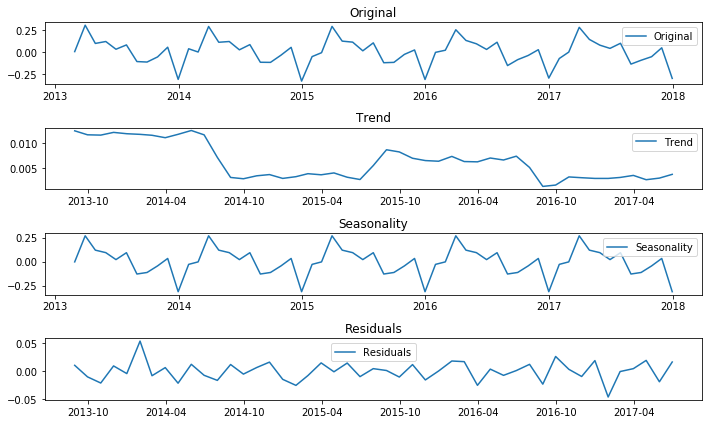

In [39]:
#Trend, seasonality and residual visualizations for the diffshift log tranformed data of Store 1
seasonalPlots(diffShiftLogSalesMonthly,storeList[0])

**By looking at the visualizations, we can see that even though seasonality and residual ranges are small and the data is trend stationary, it is still not linearly stationary and its trend visualization shows that the trend has some random changes throughout time. So, this transformation is not better than the original log transformation.**

**The next data transformation that we played with was weighted decay version of the log transformed data. We wanted to check this data because in thise transformation, we would use weights that would decay with time as the years become older. So, in essence, the weightage of recent years will be more than previous years. We use a half-life decay factor of 12, for 12 months, meaning that one full year has the same weight for each of its months, and the weight decreases going backwards in time. This would allow us to give recent years more weight so that our model would forecast better according to recent conditions.**

In [40]:
#Weighted log transformed data for Store 1
ewmLogSalesMonthly = logSalesMonthly.ewm(halflife=12).mean()
ewmLogSalesMonthly.head()

Store 1    Store 2    Store 3    Store 4    Store 5    Store 6  \
date                                                                           
2013-01-31  10.623204  10.977124  10.858460  10.773106  10.445957  10.461502   
2013-02-28  10.626064  10.984664  10.859538  10.784682  10.453571  10.459496   
2013-03-31  10.733285  11.090569  10.964555  10.887011  10.561543  10.566365   
2013-04-30  10.813238  11.170657  11.045334  10.967171  10.642175  10.644126   
2013-05-31  10.887647  11.243540  11.117930  11.040712  10.714325  10.715599   

              Store 7    Store 8    Store 9   Store 10  
date                                                    
2013-01-31  10.357997  10.933875  10.771008  10.841442  
2013-02-28  10.366305  10.936036  10.777129  10.846741  
2013-03-31  10.472510  11.042214  10.884667  10.952119  
2013-04-30  10.552827  11.121438  10.965393  11.032845  
2013-05-31  10.625069  11.194599  11.038233  11.107061

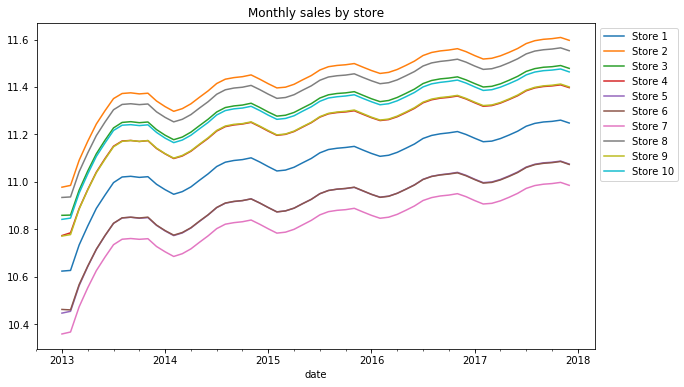

In [41]:
#Transformed weighted Data Visualization at the month level
plt.rcParams['figure.figsize'] = [10, 6]

ewmLogSalesMonthly.plot()

plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.75))
plt.title("Monthly sales by store")
plt.show()



Stationarity stats of Store 1


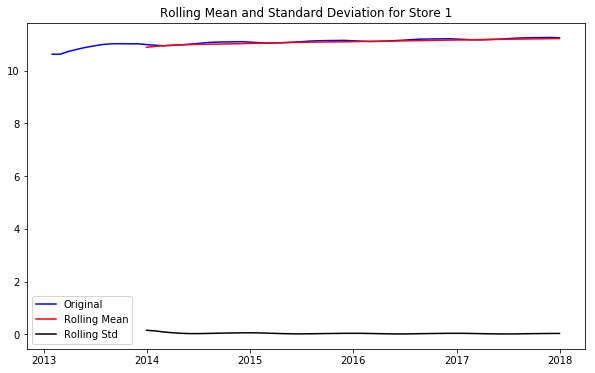



Results from the Dickey-Fuller Test for Store 1
Test Statistic                 -1.802485
p-value                         0.379229
#Lags Used                     10.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64

The dataset is not linearly stationary


Results from the KPSS Test for Store 1
Test Statistic            0.637961
p-value                   0.019185
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

 The dataset is trend stationary


In [42]:
#Getting the stats visualizations for the weighted log transformed data of Store 1
plotStats(ewmLogSalesMonthly,storeList[0])


Trend, seasonality and residual plots for Store 10


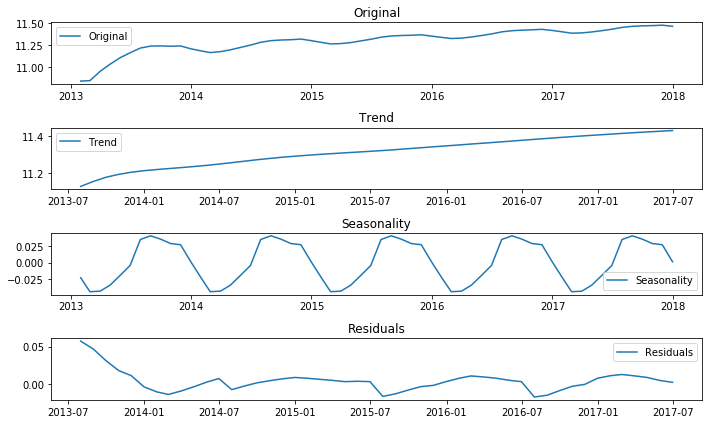

In [43]:
#Trend, seasonality and residual visualizations for the weighted log transformed data of Store 1
seasonalPlots(ewmLogSalesMonthly,storeList[num-1])    

**By looking at the visualizations, we can see that even though seasonality and residual ranges are small and the data is trend stationary, it is still not linearly stationary and its trend visualization shows that the trend has some random changes throughout time. So, this transformation is not better than the original log transformation.**

****

# ARIMA Model and Forecasting

**After playing with some additional transformations, we concluded that we will go ahead with the original log transformed data and create our ARIMA model. For our model, we chose to use the log transformed data, coupled with the diffShift log transformed data for comparison because this is a popular approach for ARIMA (to use the diffShift version alongside the main data to create an RSS plot for fitness). But, we do not know the best parameters (p,d,q) for our ARIMA model that will fit the model onto our data in the best way. So, we decided to choose the parameters (1,1,1) to get a basic idea of how our model will look like.**


AIC Value: -57.28649005077543

 RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 1


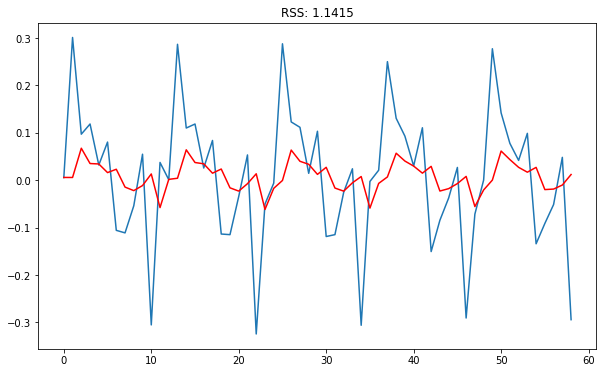



Residual Plots for Store 1


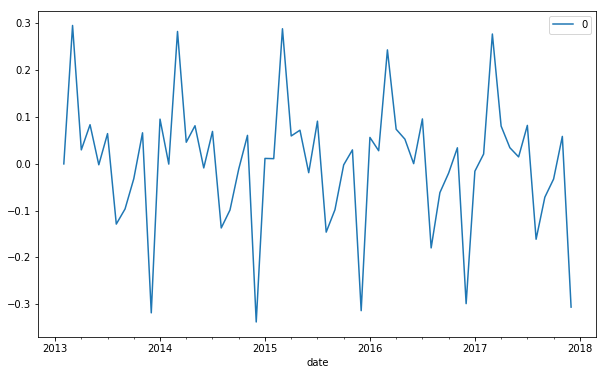

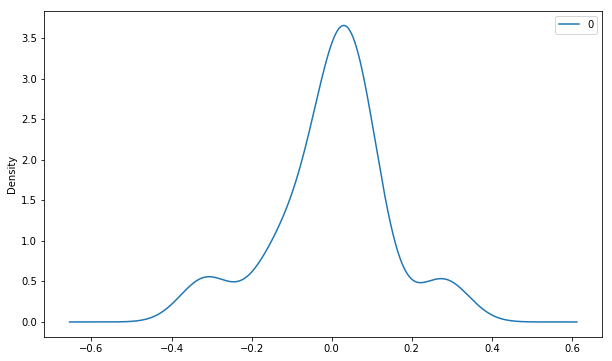

               0
count  59.000000
mean   -0.000223
std     0.140290
min    -0.338030
25%    -0.047158
50%     0.014640
75%     0.067601
max     0.295453

The residual mean is centered at 0, so there is no bias in our prediction


In [44]:
#Trying basic ARIMA model for Store 1
model = ARIMA(logSalesMonthly[storeList[0]], order = (1,1,1))
modelFit = model.fit(disp = -1)

print("\nAIC Value: " +  str(modelFit.aic))

print("\n RSS Plot between fitted model and diffShifted Log Transformed monthly sales for " + storeList[0])
plt.plot(diffShiftLogSalesMonthly[storeList[0]].values)
plt.plot(modelFit.fittedvalues.values, color = 'red')

rssRaw = modelFit.fittedvalues - diffShiftLogSalesMonthly[storeList[0]]
rssRaw.dropna(inplace = True)

plt.title('RSS: %.4f' % sum((rssRaw)**2))
plt.show(block = False)

#Plot residual errors
print('\n\nResidual Plots for ' + storeList[0])
residuals = pd.DataFrame(modelFit.resid)
residuals.plot(legend = 'Residual')
plt.show()
residuals.plot(legend = 'Residual', kind='kde')
plt.show()
print(residuals.describe())

if(int(residuals.describe()[0][1])==0):
    print("\nThe residual mean is centered at 0, so there is no bias in our prediction")
else:
    print("\nThe residual mean is not centered at 0, so there is a bias in our prediction")

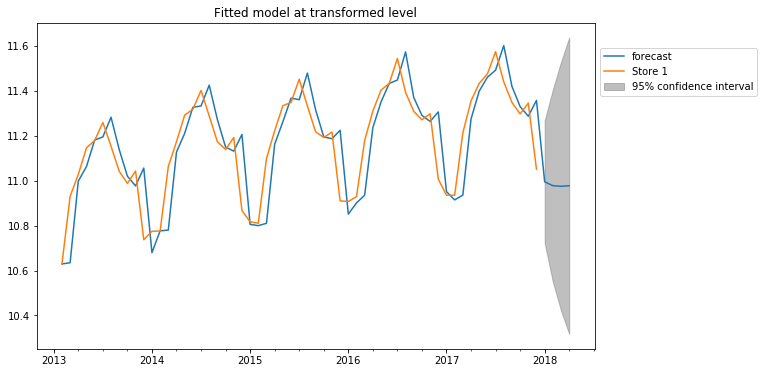

In [45]:
##Scaling back the predictions to original, fitting model and forecasting
modelFit.plot_predict(1,63)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.85))
plt.title('Fitted model at transformed level')

#Values of the forecast
forecastVal = modelFit.forecast(steps = 3)[0]

**Using the (1,1,1) parameters, we see that the RSS plot was capturing the distribution of the data, but was not doing good at capturing the actual shape of the main data. Even though the RSS value is small (meaning that the model is precise), the fit is not very accurate. Moving to the residual plots, we see that the residuals are random and have their mean centered at zero, so the model does not have bias and is not heteroskedastic. However, our predictive forecast plot showed that even though the model was capturing the actual data pretty well, the future forecast was not very accurate and was broad, if you look at the range covered by the 95% confidence interval in the forecast plot.**

**Now, having an idea about how the model looks like, we devised methods to obtain the best parameters (p,d,q) that could provide us with the best forecasting model. So, we chose the parameters that gave us the smallest RSS value with a low AIC value (because, as a heuristic, a low AIC value leads to a better model). We did this by trial and error.**

In [46]:
#ARIMA model with the best parameters
def arimaModel(df,dfDiffShift,val):
    import itertools
    p=d=q=range(0,6)
    pdq = list(itertools.product(p,d,q))
    
    import warnings
    import math
    warnings.filterwarnings('ignore')
    listParam = []
    listAic = []
    listRSS = []
    for param in pdq:
        try:
            modelArima = ARIMA(df[val],order=param)
            modelArimaFit = modelArima.fit()
            
            if math.isnan(modelArimaFit.aic) == False:
                listParam.append(param)
                listAic.append(modelArimaFit.aic)
            
                rssRaw = modelArimaFit.fittedvalues - dfDiffShift[val]
                rssRaw.dropna(inplace = True)
                rss = sum((rssRaw)**2)
            
                listRSS.append(rss)
            
        except:
            continue  
            
    minVal = min(listAic)
    minInd = listAic.index(minVal)
    
    minValRSS = min(listRSS)
    minIndRSS = listRSS.index(minValRSS)
    
   
    
    
    print("\n********** ARIMA Model for Log Transformed Data of " +val+' **********\n')
    
    print("\nBest (p, d, q) Parameters: "+str(listParam[minIndRSS]))
    
    model = ARIMA(df[val], order = (listParam[minIndRSS]))
    modelFit = model.fit()

    
    print("\nAIC Value: " +  str(modelFit.aic))
       
    print("\nRSS Plot between fitted model and diffShifted Log Transformed monthly sales for " + val)
    plt.plot(dfDiffShift[val].values)
    plt.plot(modelFit.fittedvalues.values, color = 'red')

    rssRaw = modelFit.fittedvalues - dfDiffShift[val]
    rssRaw.dropna(inplace = True)
    rss = sum((rssRaw)**2)
    
    plt.title('RSS: %.4f' % rss)
    plt.show(block = False)
    
    #Plot residual errors
    print('\n\nResidual Plots for ' + val)
    residuals = pd.DataFrame(modelFit.resid)
    residuals.plot(legend = 'Residual')
    plt.show()
    residuals.plot(legend = 'Residual', kind='kde')
    plt.show()
    print(residuals.describe())
    
    if(int(residuals.describe()[0][1])==0):
        print("\nThe residual mean is centered at 0, so there is no bias in our prediction")
    else:
        print("\nThe residual mean is not centered at 0, so there is a bias in our prediction")
    
    return modelFit


********** ARIMA Model for Log Transformed Data of Store 1 **********


Best (p, d, q) Parameters: (5, 1, 2)

AIC Value: -111.20681035527733

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 1


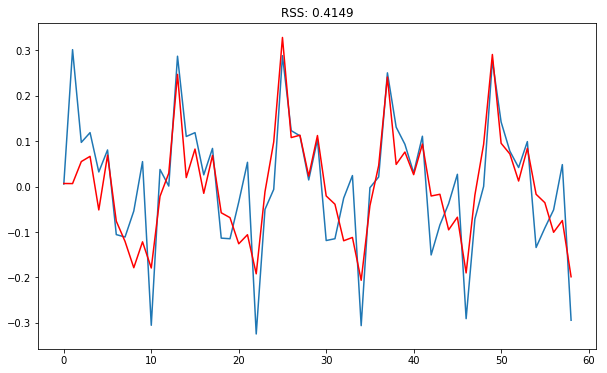



Residual Plots for Store 1


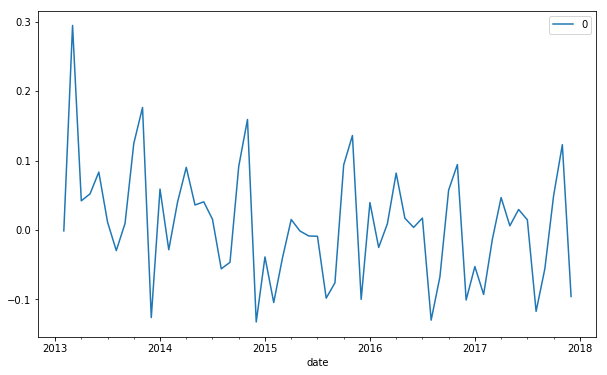

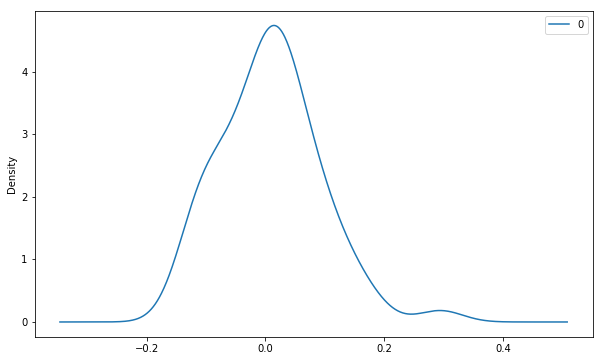

               0
count  59.000000
mean    0.008801
std     0.084107
min    -0.132380
25%    -0.049498
50%     0.009617
75%     0.050784
max     0.294765

The residual mean is centered at 0, so there is no bias in our prediction


In [47]:
#Creating model
model = arimaModel(logSalesMonthly,diffShiftLogSalesMonthly,storeList[0])

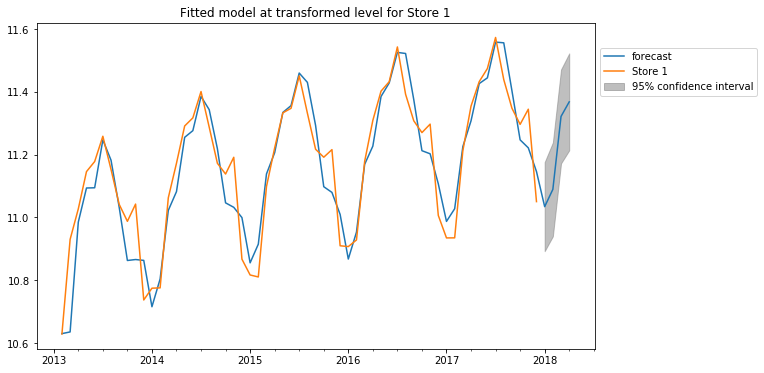

In [48]:
##Scaling back the predictions to original, fitting model and forecasting
model.plot_predict(1,len(logSalesMonthly)+3)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.85))
plt.title('Fitted model at transformed level for ' + storeList[0])

#Values of the forecast
forecastVal = model.forecast(steps = 3)[0]

**Using our algorithm, we were able to find the best parameters (5,1,2). Here, we see that the RSS plot was pretty decent at capturing the actual shape of the main data. The RSS value is very small, meaning that the fit is very precise and accurate. Moving to the residual plots, we see that the residuals are random and have their mean centered at zero, so the model does not have bias and is not heteroskedastic. Moreover, our predictive forecast plot showed that the model was capturing the actual data pretty well. Also, the future forecast is very accurate and not that broad, if you look at the range covered by the 95% confidence interval in the forecast plot.** 

**The next step was to transform our forecast predictions back to scale in the original format.**

In [49]:
#Converting log transformed forecast values to original scale
def forecastInContinuity(df,forecastVal,val, months):
    finalForecastVal = np.exp(forecastVal)
    
    current = df[storeList[0]].index[-1]
    new = []
    for i in range(0,len(finalForecastVal)):
        next_month = str(current.year + (current.month // 12))+'-'+str(((current.month % 12) + 1)) +'-01'
        next_month = pd.to_datetime(next_month,format='%Y-%m')
        current = next_month
        new.append(next_month.strftime("%Y-%m"))
    forecastDf = pd.DataFrame({val :finalForecastVal,'YearMonth':new})
    forecastDf.set_index('YearMonth',inplace = True)
    forecastDf.index = pd.to_datetime(forecastDf.index)
    forecastDf = forecastDf.resample('M').sum()

    finalDf = df[val].append(forecastDf)
    finalDf.columns = [val,'Forecast']

    finalDf.plot(title = str(months)+" months Forecast for " +val+' in continuity at original scale')
    
    return finalDf,forecastDf

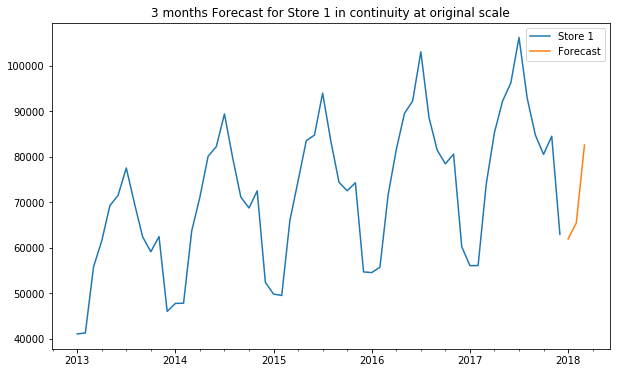

In [50]:
#Creating final forecast plot with original sales data
finalDf,forecastDf = forecastInContinuity(salesMonthly,forecastVal,storeList[0],3)

###Here, we can see our final forecast for the original sales of Store 1 for the first 3 months of 2018.

**As an added bonus, we also applied ARIMA to the log transformed data at day level to see how the forecast fared.**

In [51]:
#Log Transformed data for Store 1 at day level
logSales,movAvgLogSales = logTransformedStats(sales)
logSalesMonthly.head()

Store 1    Store 2    Store 3    Store 4    Store 5    Store 6  \
date                                                                           
2013-01-31  10.623204  10.977124  10.858460  10.773106  10.445957  10.461502   
2013-02-28  10.628763  10.991780  10.860555  10.795609  10.460758  10.457603   
2013-03-31  10.930013  11.284882  11.157236  11.074762  10.759646  10.762446   
2013-04-30  11.027166  11.384944  11.261472  11.181654  10.857921  10.852187   
2013-05-31  11.145796  11.496400  11.369794  11.295851  10.964640  10.963567   

              Store 7    Store 8    Store 9   Store 10  
date                                                    
2013-01-31  10.357997  10.933875  10.771008  10.841442  
2013-02-28  10.374147  10.938077  10.782907  10.851742  
2013-03-31  10.667373  11.237027  11.081973  11.145464  
2013-04-30  10.767727  11.333416  11.181389  11.248843  
2013-05-31  10.875705  11.448419  11.290944  11.364541

In [52]:
#Diffshift Log Transformed data for Store 1 at day level
diffShiftLogSales = diffShift(logSales)
diffShiftLogSalesMonthly.head()

Store 1   Store 2   Store 3   Store 4   Store 5   Store 6  \
date                                                                     
2013-02-28  0.005559  0.014656  0.002095  0.022503  0.014801 -0.003900   
2013-03-31  0.301250  0.293102  0.296680  0.279153  0.298888  0.304843   
2013-04-30  0.097153  0.100062  0.104237  0.106892  0.098275  0.089742   
2013-05-31  0.118630  0.111455  0.108321  0.114197  0.106719  0.111380   
2013-06-30  0.032090  0.037876  0.045067  0.041530  0.050771  0.050330   

             Store 7   Store 8   Store 9  Store 10  
date                                                
2013-02-28  0.016150  0.004202  0.011899  0.010300  
2013-03-31  0.293226  0.298950  0.299066  0.293722  
2013-04-30  0.100354  0.096389  0.099416  0.103379  
2013-05-31  0.107978  0.115003  0.109555  0.115699  
2013-06-30  0.045311  0.042230  0.040700  0.035092


********** ARIMA Model for Log Transformed Data of Store 1 **********


Best (p, d, q) Parameters: (5, 1, 4)

AIC Value: -4567.068663367121

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 1


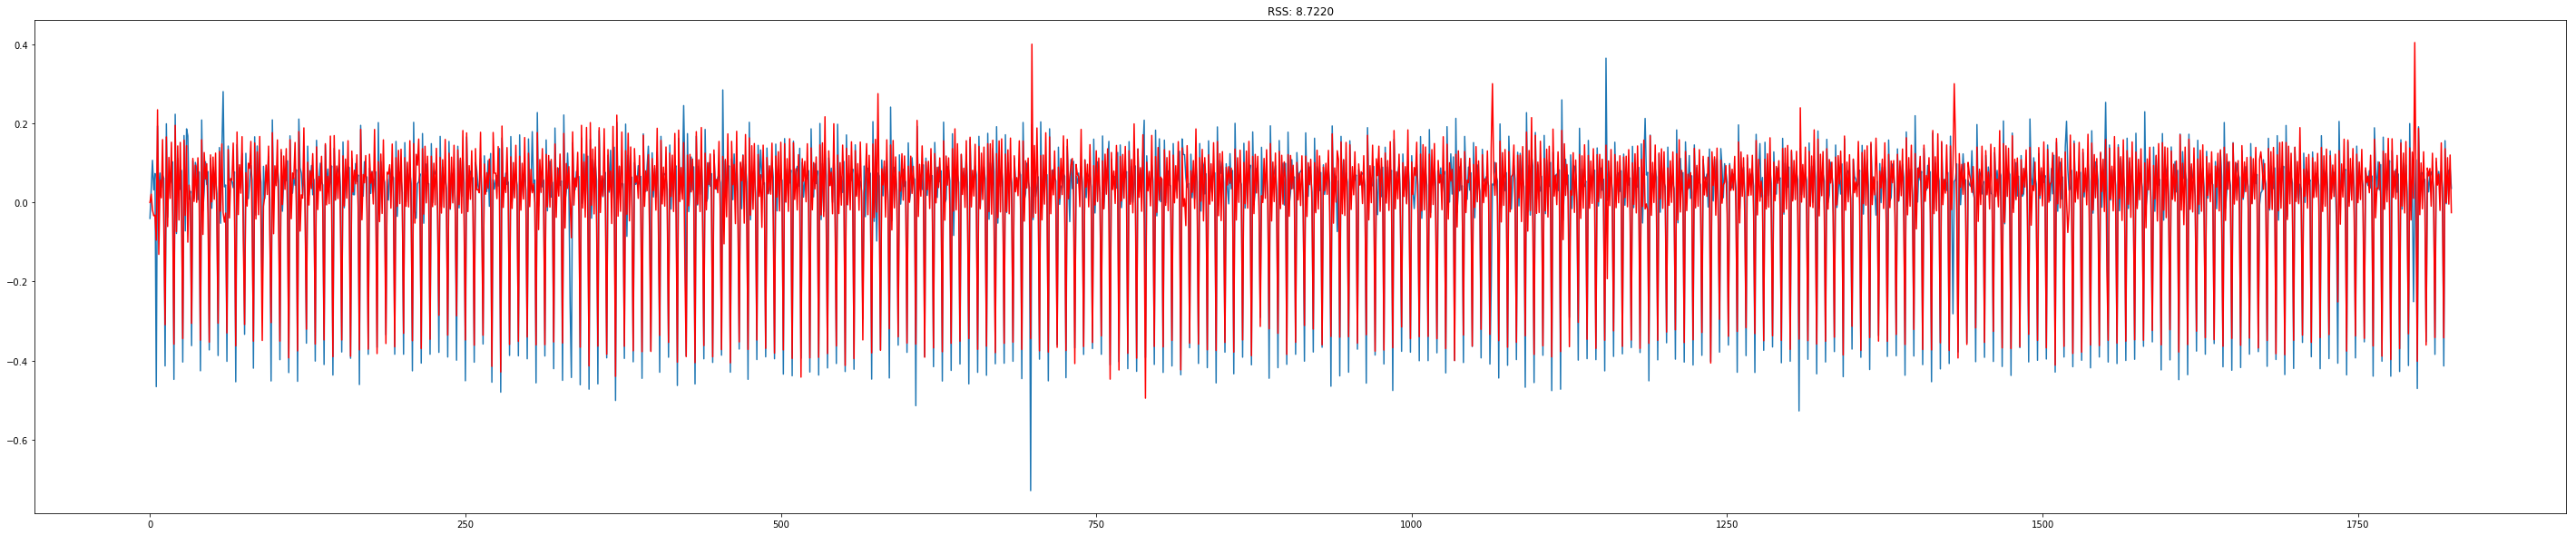



Residual Plots for Store 1


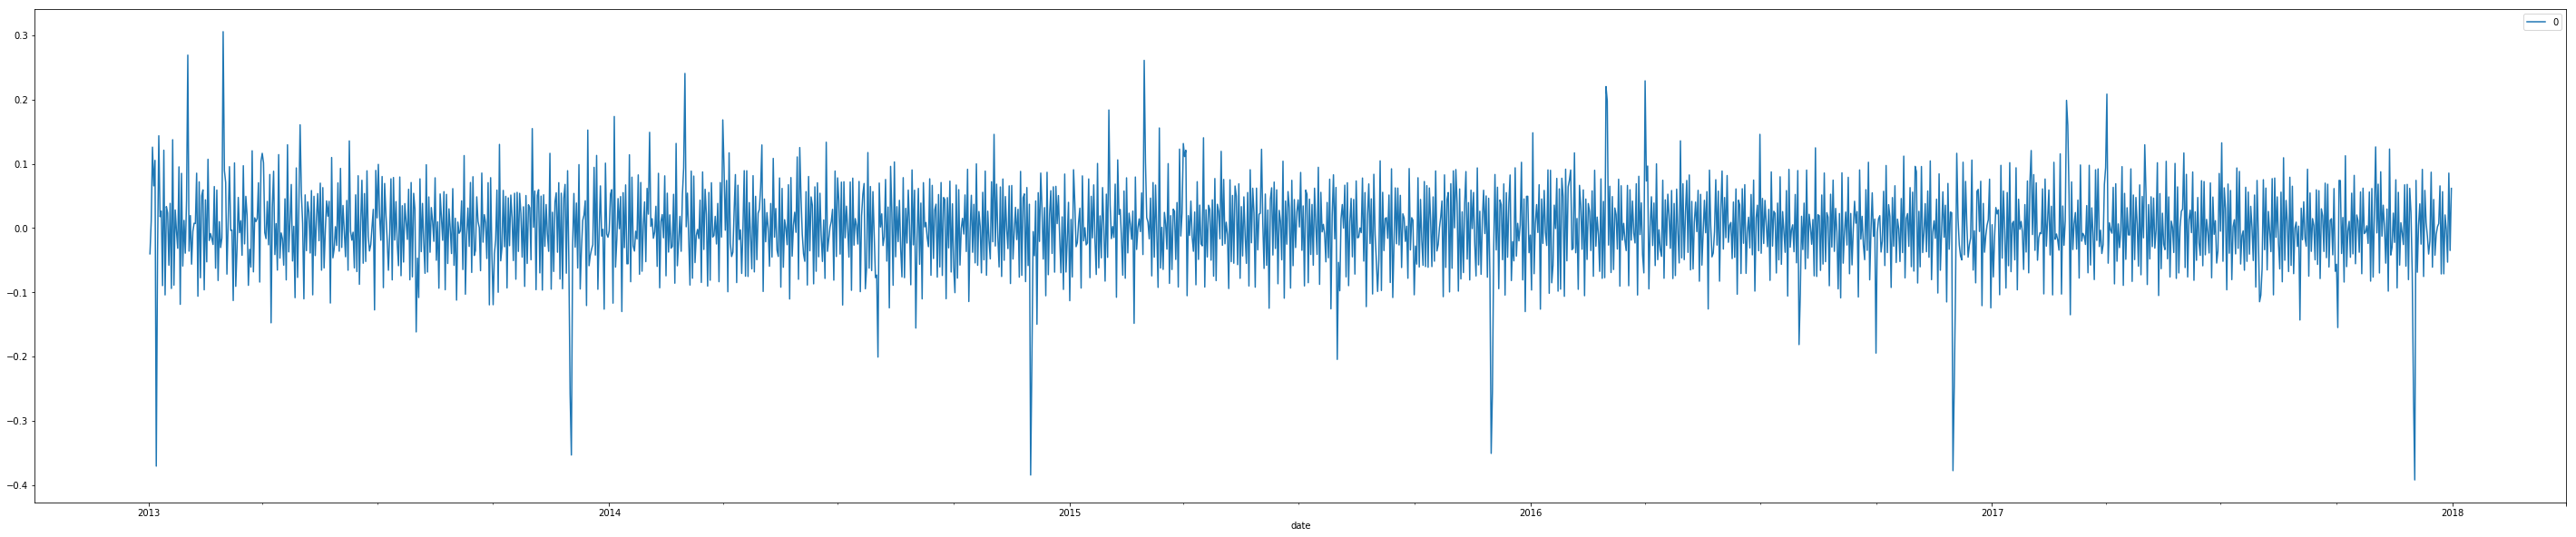

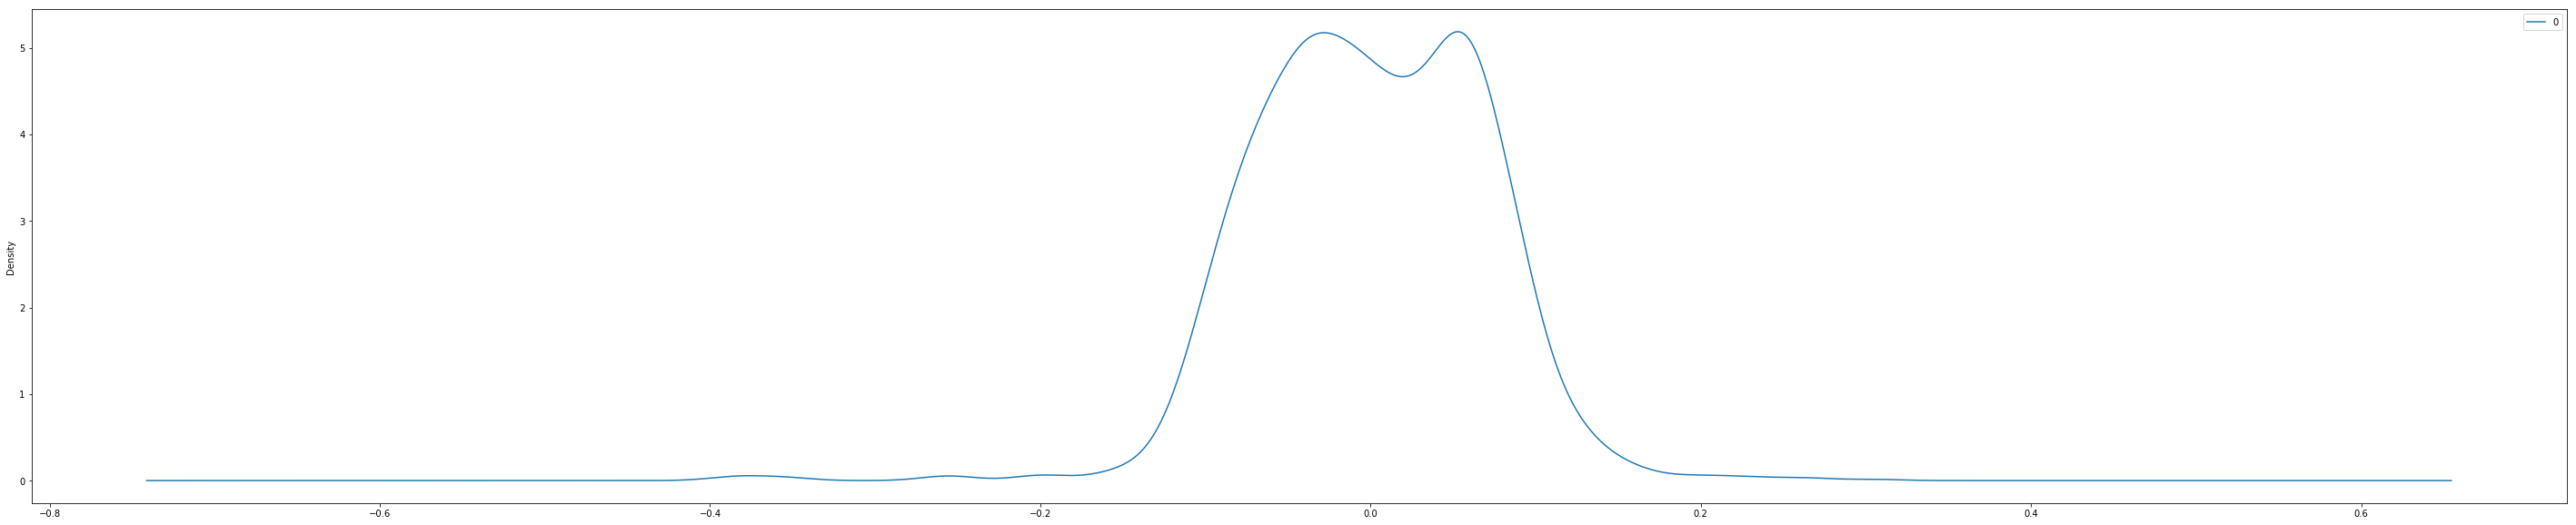

                 0
count  1825.000000
mean      0.000485
std       0.069149
min      -0.392282
25%      -0.048410
50%       0.000054
75%       0.052652
max       0.305613

The residual mean is centered at 0, so there is no bias in our prediction


In [53]:
#Creating model at day level
plt.rcParams['figure.figsize'] = [50, 10]
modelDay = arimaModel(logSales,diffShiftLogSales,storeList[0])

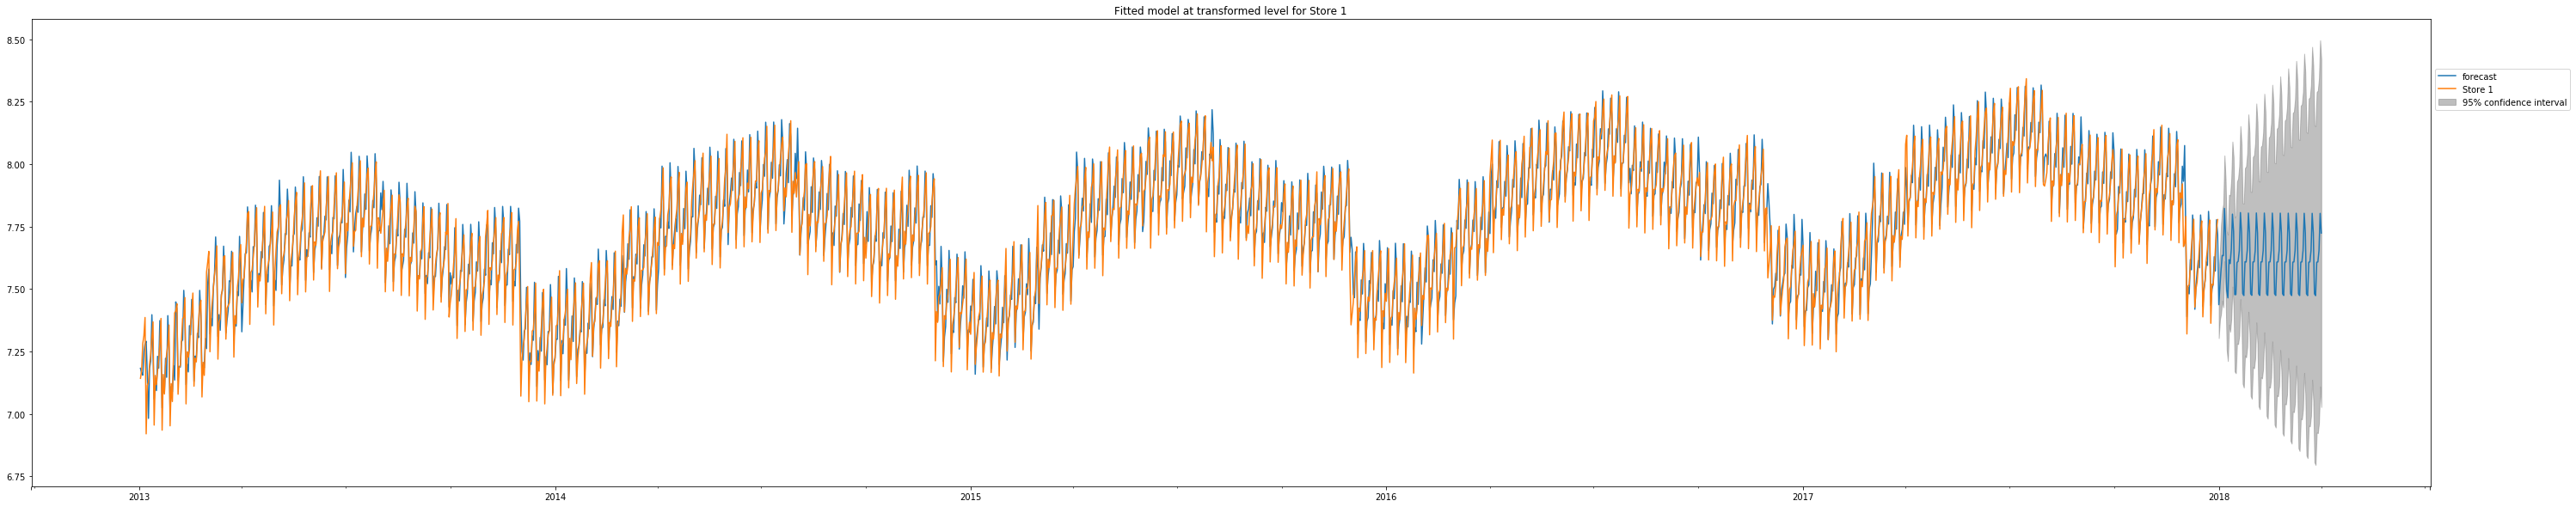

In [54]:
##Scaling back the predictions to original, fitting model and forecasting
modelDay.plot_predict(1,len(logSales)+90)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.85))
plt.title('Fitted model at transformed level for ' + storeList[0])

#Values of the forecast
forecastVal = model.forecast(steps = 3)[0]

**As we can see, the forecast plot does not show a very good forecast. The range is very broad, considering the shaded area at 95% confidence interval. So, instead, we will stick to our model at the month level because the month level forecast is very precise and accurate.**

****

# Conclusion

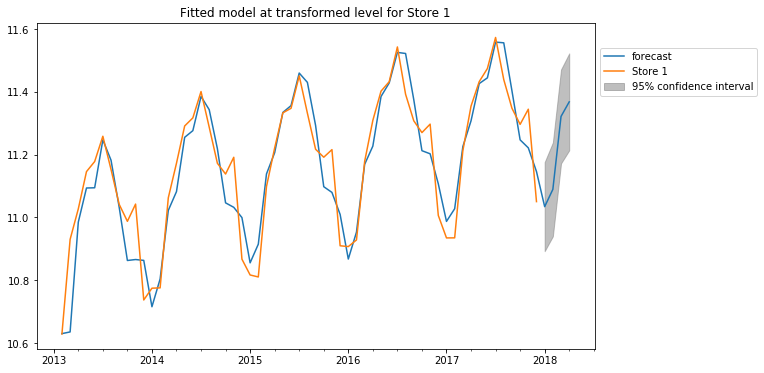

In [55]:
##Scaling back the predictions to original, fitting model and forecasting
plt.rcParams['figure.figsize'] = [10, 6]
model.plot_predict(1,len(logSalesMonthly)+3)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.85))
plt.title('Fitted model at transformed level for ' + storeList[0])

#Values of the forecast
forecastVal = model.forecast(steps = 3)[0]

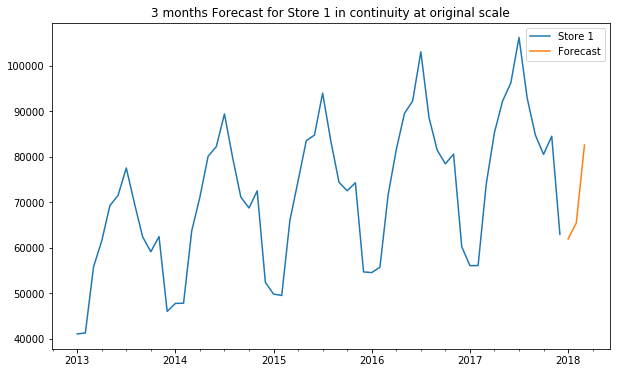

In [56]:
#Creating final forecast plot with original sales data
finalDf,forecastDf = forecastInContinuity(salesMonthly,forecastVal,storeList[0],3)

**Our ARIMA model at the monthly level, with parameters (5,1,2) gave us the best forecast for the first 3 months of 2018. The forecast had a smaller scattering range (based on the 95% confidence interval) and accurately followed the distribution of our data.**

****

# Discussion

**In this assignment, we had data that was rich in multiple attributes. However, we had to cut it down, make it lean and simplify it to get a model on a specific attribute (stores). We could have chosen to work with the items instead, and that would have answered a different business question. However, we focused on stores because they were less in quantity and had simpler data characteristics. From our models, we can predict or make an educated guess about the demand a particular store will have in the future. And that can help store owners make better decisions beforehand, such as buying stock earlier, according to the forecast. This can help them cater to their product demand better. If we had chosen to model the items, then we could have helped the store owners to get the specific items in advance, according to their predicted demand in the future.**

**Moving on, we try to answer a few questions posed to us in this assignment. First things first, we played with our data and were able to get rid of its seasonality by transforming it. Normally, a way to get rid of seasonality is to transform the data and differencing it. Another way is to fit a polynomial function to the data (such as a sine function), and then subtracting that polynomial function from it (getting rid of the seasonality in doing so).**

**We used ARIMA model in this assignment because it is a fairly simplistic model that can capture small time series very well in the short term. We could have used deep learning too because the number of observations was big enough for a shallow deep learning model. But, it is a popular opinion that deep learning works better in the long term and with more complex time series (with more attributes or data fields). Considering the nature of our data and the short term forecasting of our model (the next 3 months), we used ARIMA because it tends to work pretty accurately in these circumstances. Nevertheless, a plus side of deep learning is that it is a non-parametric model, which means that it trains weights and those pre-trained weights (model) can be applied to different data that follows the same distributions, such as the data for the other stores 2-10. However, ARIMA is a parametric model, which means that we need to train our model every time when we are dealing with new data. So, the stores 2-10 have their own parameters for ARIMA and have to be trained separately. This makes the process more time consuming and makes the ARIMA models less flexible with regards to different datasets. To the question that can either beat xgboost, we will say that is is possible. xgboost is a penalizing model, meaning that it gets rid of overfitting. However, it works best when the number of predictors/attributes are more than the observations, which is clearly not the case in our data. So, I think that deep learning or ARIMA might be able to outperform xgboost because we might not have that much overfitting in our data either. However, we have no way to know that for sure because we do not have the actual sales numbers for the first 3 months of 2018 to compare to our forecast.**

**There was another question that whether we should pool all the stores together or should they be modelled separately. To answer that question, we will say that it depends on our business question. If we wanted to get an overall forecast for all our stores, then we could have pooled them together. But, we focused on a different business question that required us to get the specific forecasts for each store, independently. Also, pooling the stores together would have been too general and would have had no significant use in a business scenario, as compared to modelling them separately, which can help businesses evaluate which specific stores are doing well in general sales.**

# The End

****

# Additional appendix (Models for the remaining stores)

**In this additional appendix, we apply the ARIMA models with their respective best parameters on all the other stores.**

In [57]:
#Creating easy to call model creation function
plt.rcParams['figure.figsize'] = [10, 6]
def createModel(val):
    model = arimaModel(logSalesMonthly,diffShiftLogSalesMonthly,val)

    ##Scaling back the predictions to original, fitting model and forecasting
    model.plot_predict(1,len(logSalesMonthly)+3)
    plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.85))
    plt.title('Fitted model at transformed level for ' + val)

    #Values of the forecast
    forecastVal = model.forecast(steps = 3)[0]

    #Creating final forecast plot with original sales data
    finalDf,forecastDf = forecastInContinuity(salesMonthly,forecastVal,val,3)


********** ARIMA Model for Log Transformed Data of Store 2 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.86421832303117

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 2


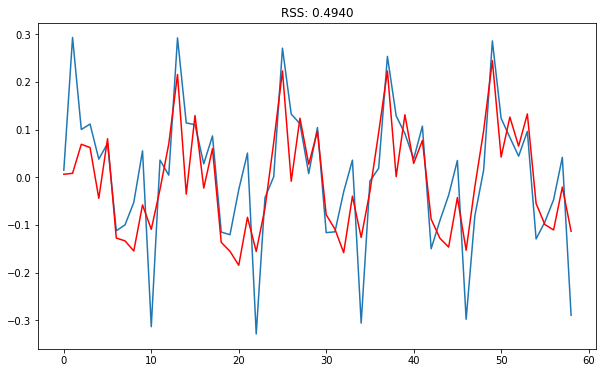



Residual Plots for Store 2


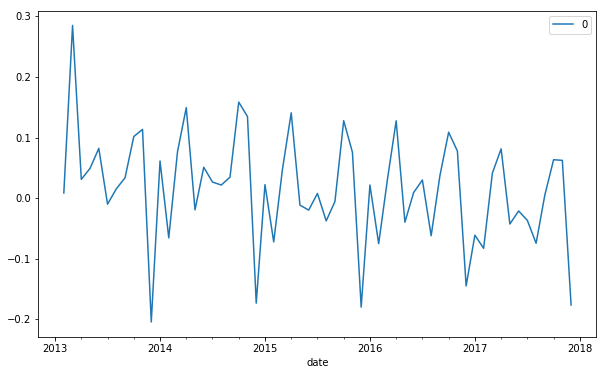

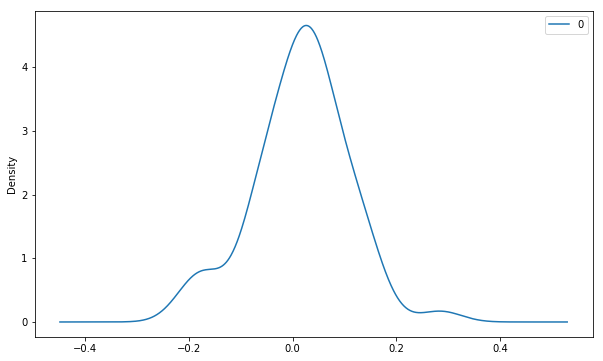

               0
count  59.000000
mean    0.015925
std     0.090885
min    -0.204289
25%    -0.037070
50%     0.022264
75%     0.069552
max     0.285000

The residual mean is centered at 0, so there is no bias in our prediction


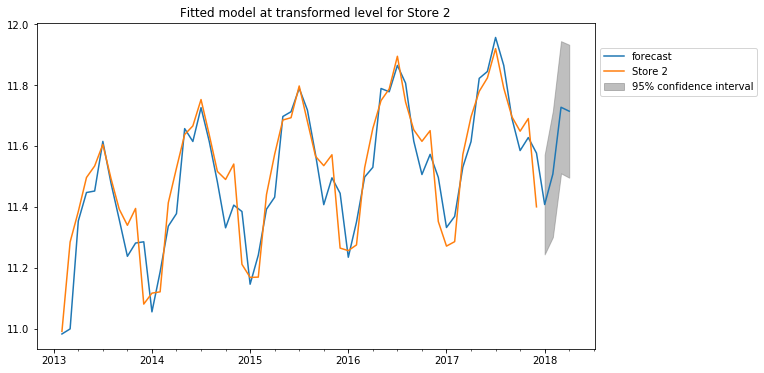

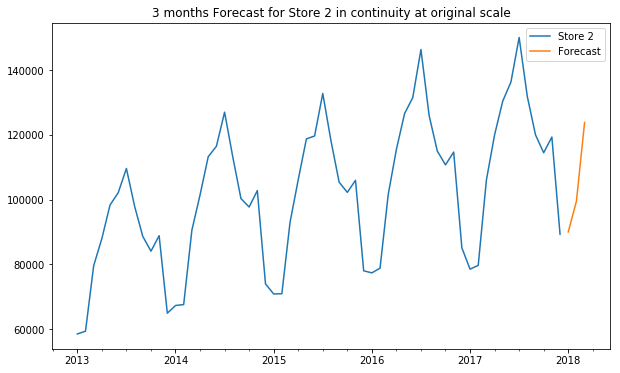

In [58]:
createModel(storeList[1])


********** ARIMA Model for Log Transformed Data of Store 3 **********


Best (p, d, q) Parameters: (2, 1, 2)

AIC Value: -85.53883251221814

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 3


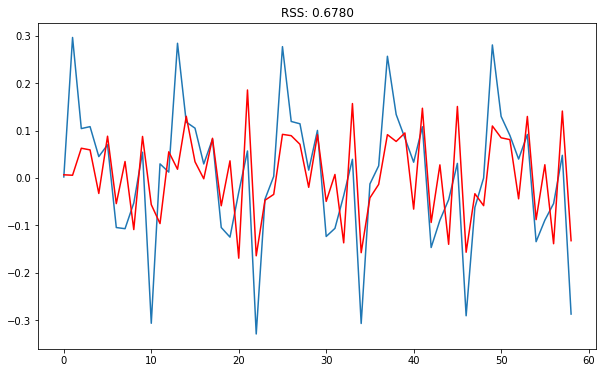



Residual Plots for Store 3


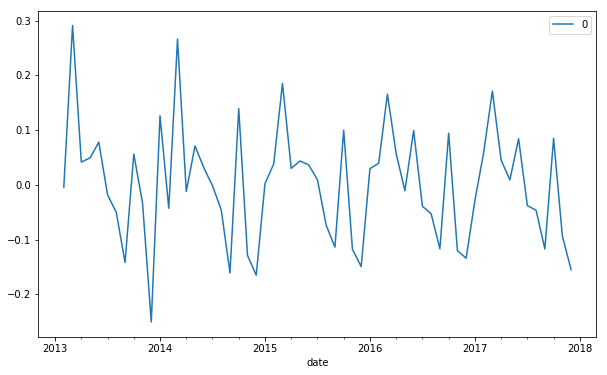

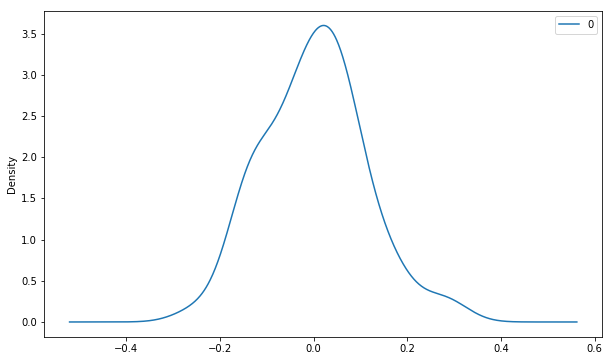

               0
count  59.000000
mean    0.001092
std     0.108116
min    -0.250651
25%    -0.063490
50%     0.002046
75%     0.057697
max     0.291033

The residual mean is centered at 0, so there is no bias in our prediction


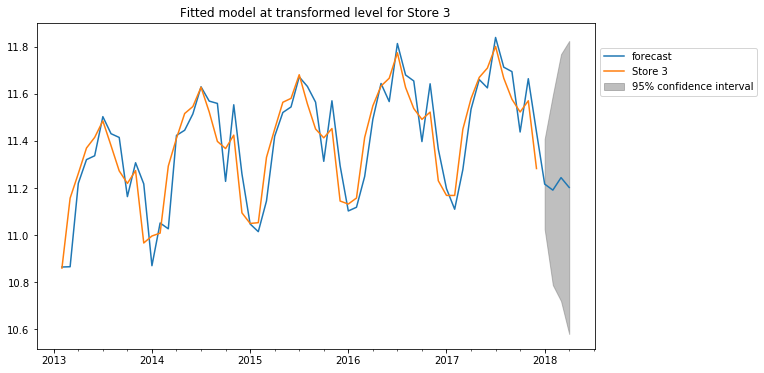

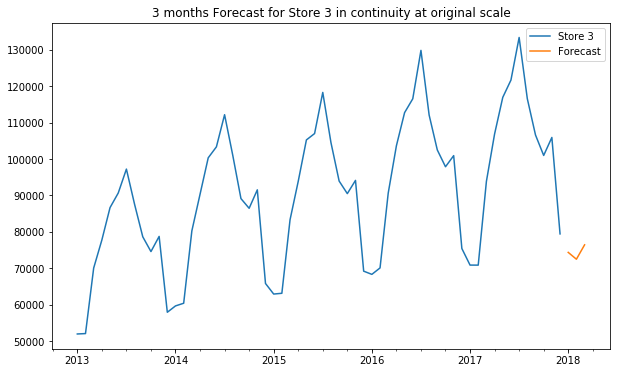

In [59]:
createModel(storeList[2])


********** ARIMA Model for Log Transformed Data of Store 4 **********


Best (p, d, q) Parameters: (2, 1, 2)

AIC Value: -83.0400788007328

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 4


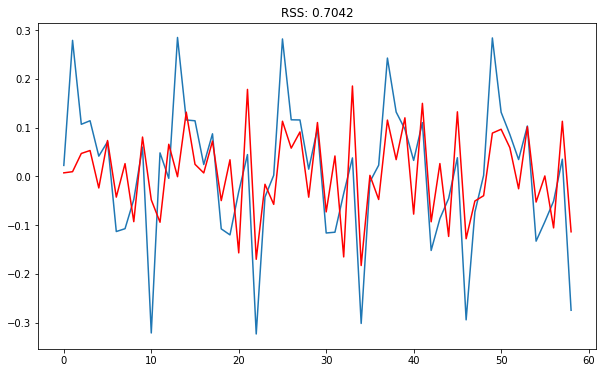



Residual Plots for Store 4


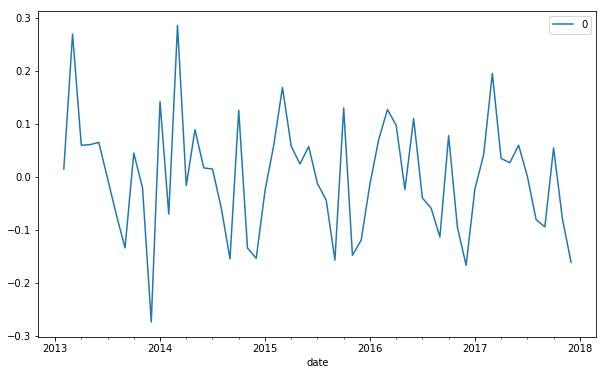

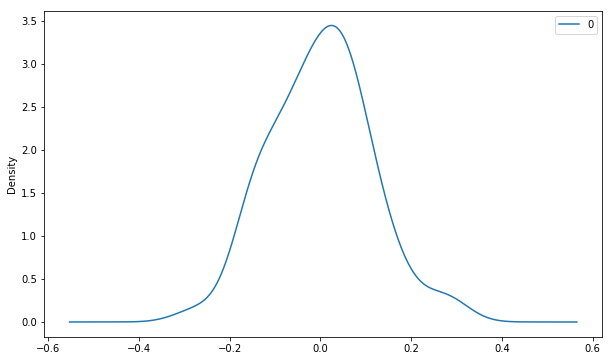

               0
count  59.000000
mean    0.000924
std     0.110185
min    -0.273303
25%    -0.074248
50%     0.001437
75%     0.060549
max     0.285818

The residual mean is centered at 0, so there is no bias in our prediction


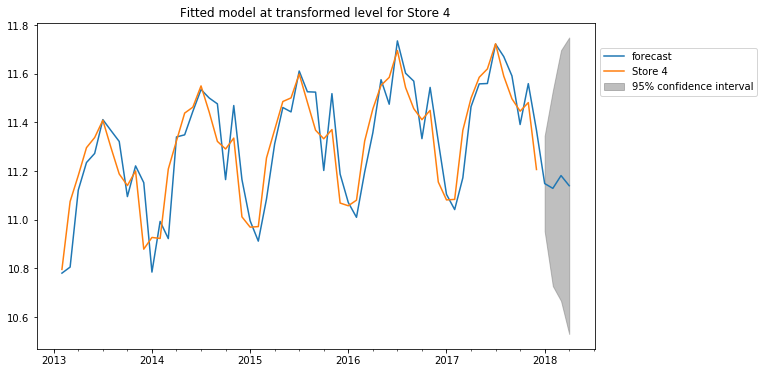

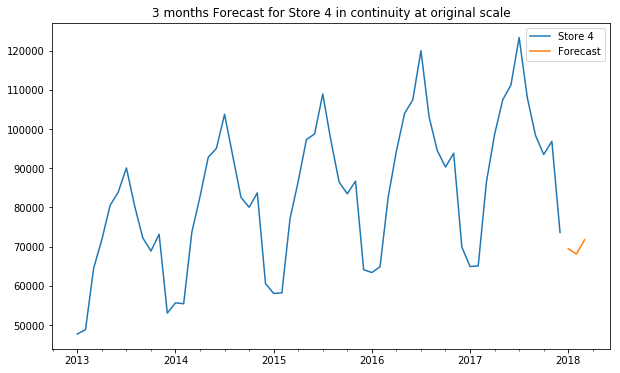

In [60]:
createModel(storeList[3])


********** ARIMA Model for Log Transformed Data of Store 5 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.32151095520553

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 5


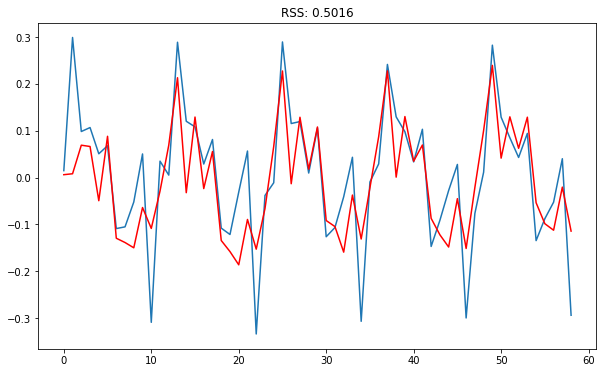



Residual Plots for Store 5


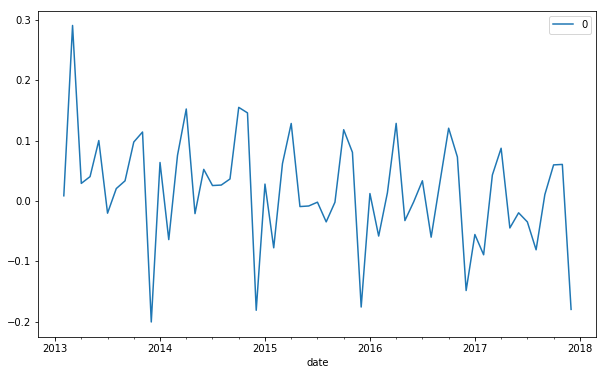

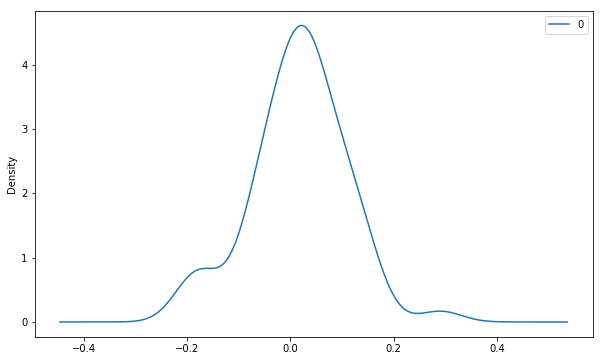

               0
count  59.000000
mean    0.016289
std     0.091536
min    -0.200345
25%    -0.033479
50%     0.025630
75%     0.068391
max     0.290732

The residual mean is centered at 0, so there is no bias in our prediction


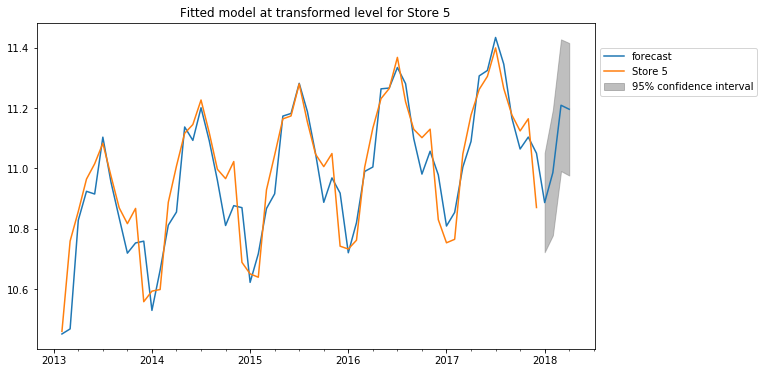

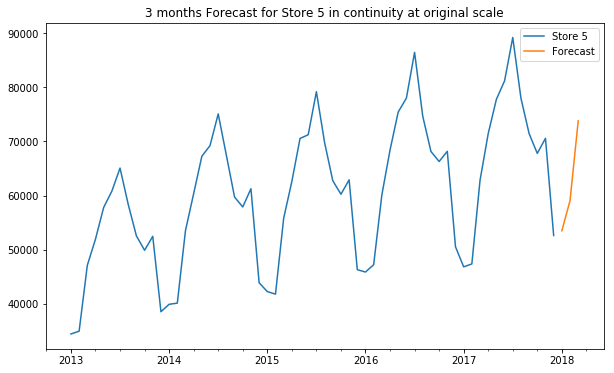

In [61]:
createModel(storeList[4])


********** ARIMA Model for Log Transformed Data of Store 6 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.49999431845046

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 6


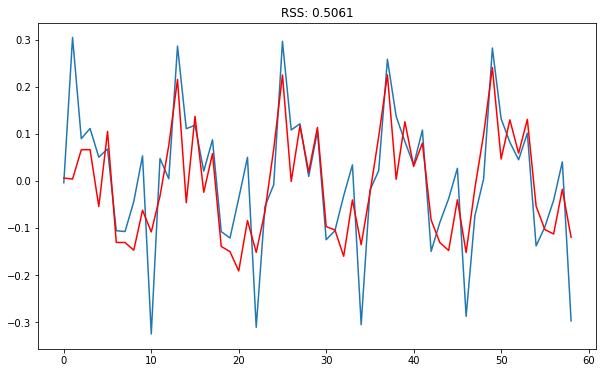



Residual Plots for Store 6


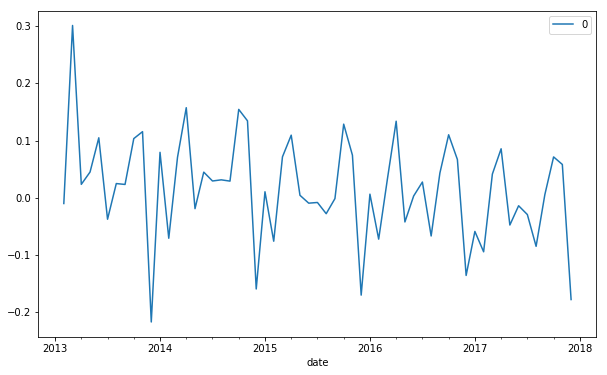

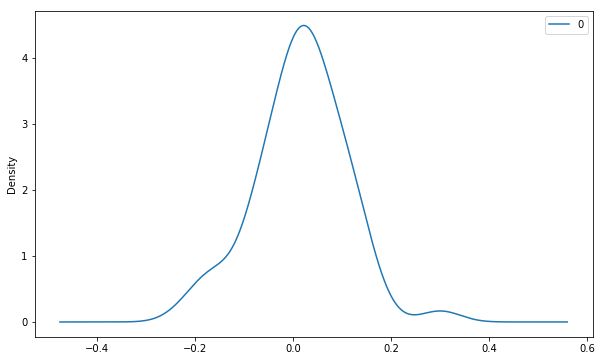

               0
count  59.000000
mean    0.015757
std     0.092054
min    -0.216846
25%    -0.033322
50%     0.023512
75%     0.071465
max     0.300969

The residual mean is centered at 0, so there is no bias in our prediction


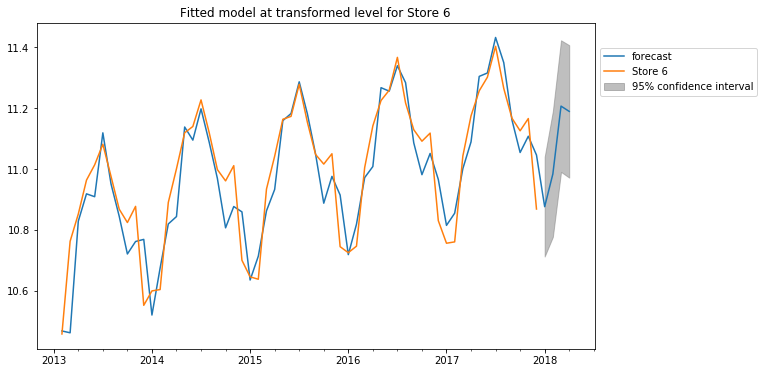

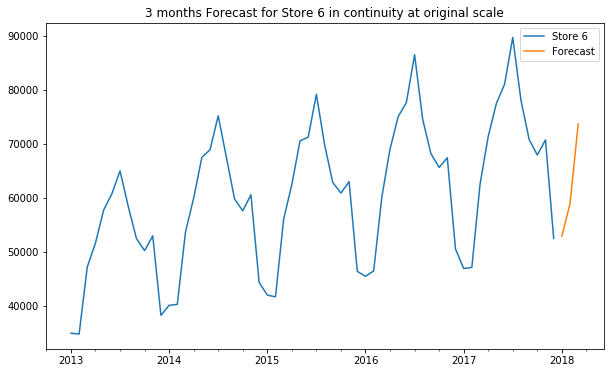

In [62]:
createModel(storeList[5])


********** ARIMA Model for Log Transformed Data of Store 7 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -98.57375153513172

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 7


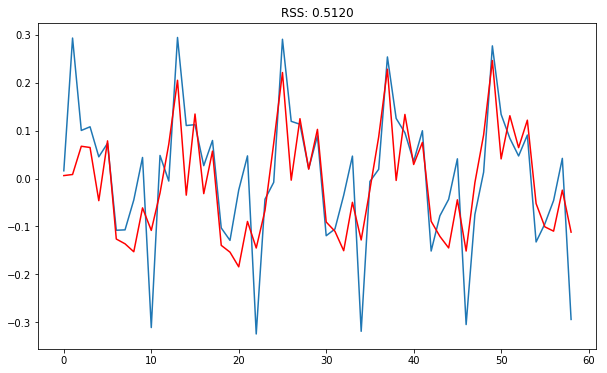



Residual Plots for Store 7


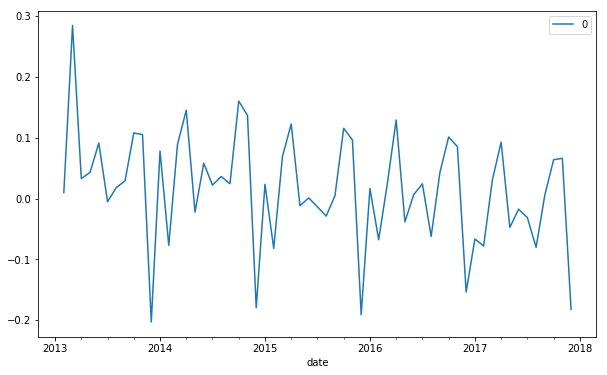

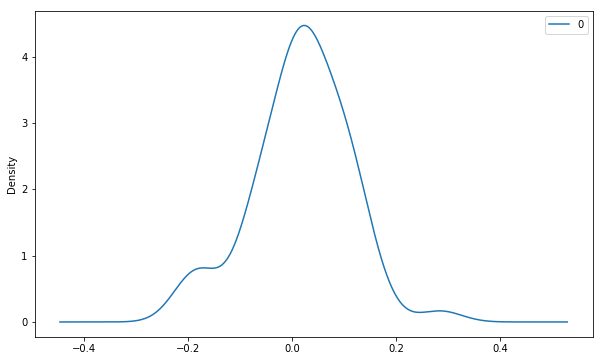

               0
count  59.000000
mean    0.016372
std     0.092497
min    -0.202791
25%    -0.029881
50%     0.023586
75%     0.081935
max     0.284807

The residual mean is centered at 0, so there is no bias in our prediction


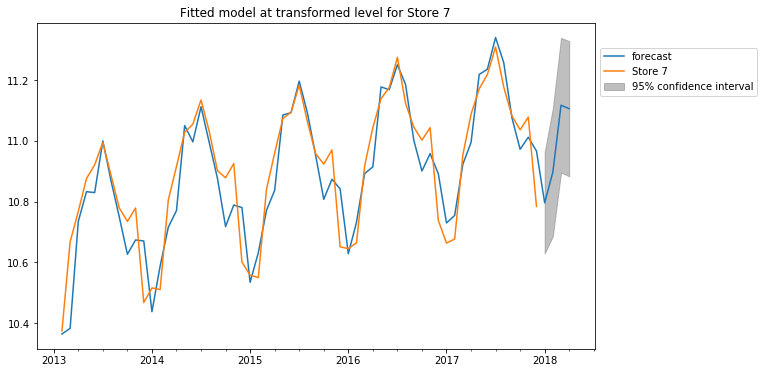

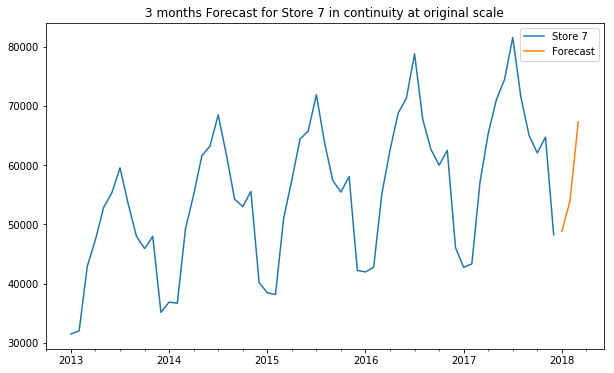

In [63]:
createModel(storeList[6])


********** ARIMA Model for Log Transformed Data of Store 8 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.47740672686174

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 8


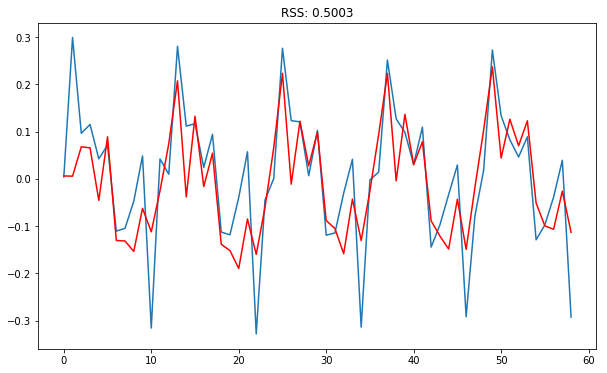



Residual Plots for Store 8


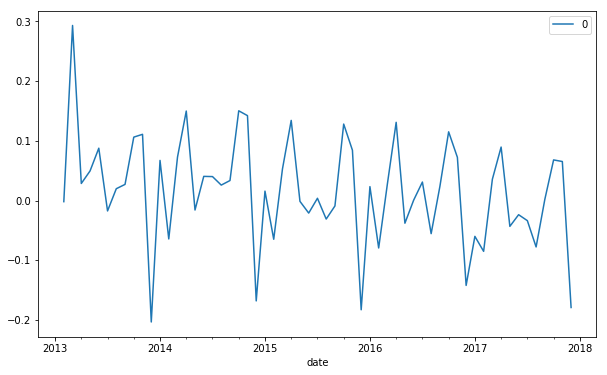

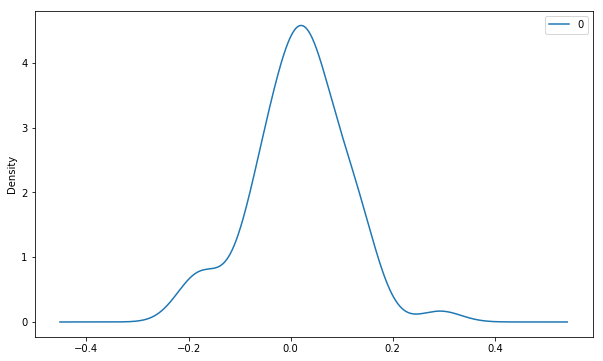

               0
count  59.000000
mean    0.016067
std     0.091453
min    -0.203521
25%    -0.032428
50%     0.023604
75%     0.070155
max     0.293258

The residual mean is centered at 0, so there is no bias in our prediction


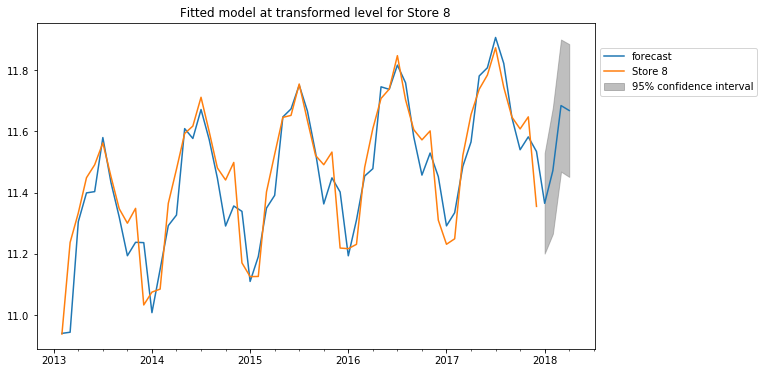

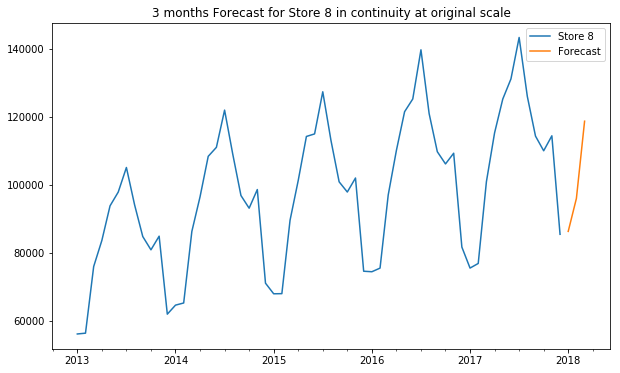

In [64]:
createModel(storeList[7])


********** ARIMA Model for Log Transformed Data of Store 9 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.77257627742208

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 9


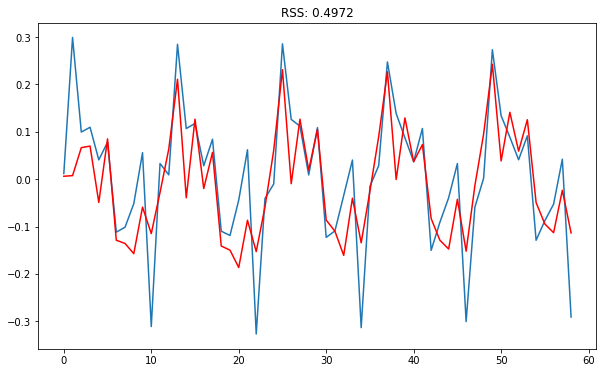



Residual Plots for Store 9


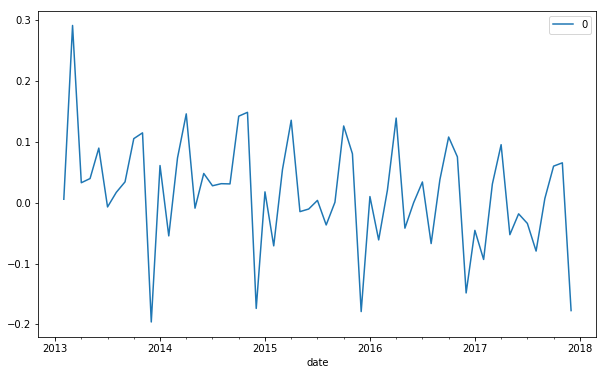

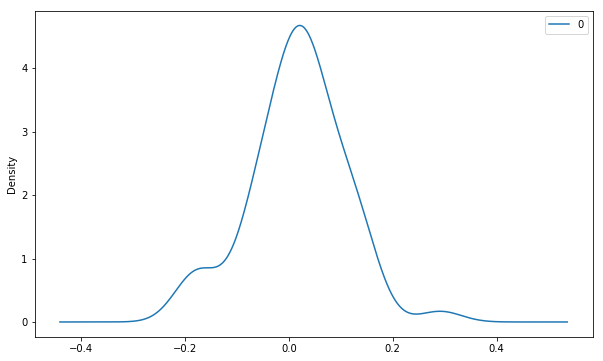

               0
count  59.000000
mean    0.016532
std     0.091071
min    -0.196176
25%    -0.035288
50%     0.020726
75%     0.069686
max     0.291618

The residual mean is centered at 0, so there is no bias in our prediction


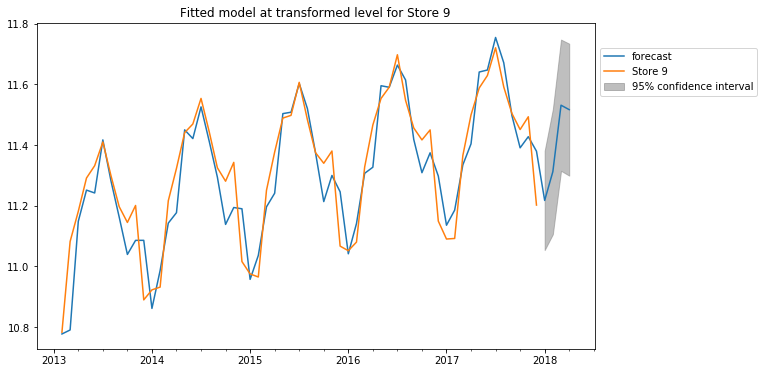

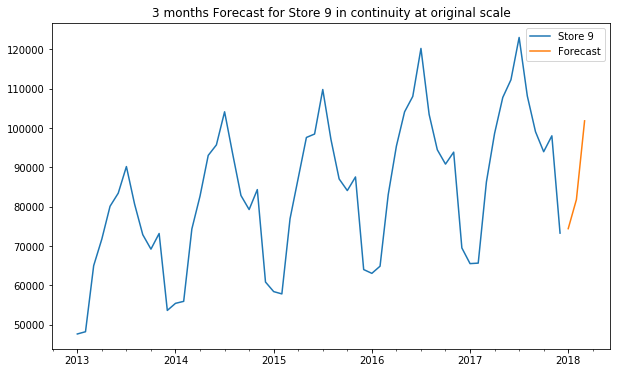

In [65]:
createModel(storeList[8])


********** ARIMA Model for Log Transformed Data of Store 10 **********


Best (p, d, q) Parameters: (5, 1, 1)

AIC Value: -100.6308427593236

RSS Plot between fitted model and diffShifted Log Transformed monthly sales for Store 10


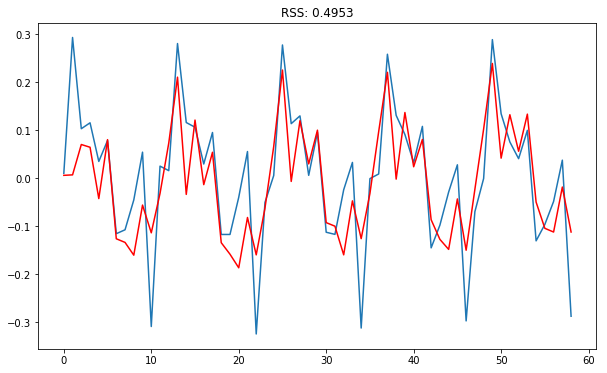



Residual Plots for Store 10


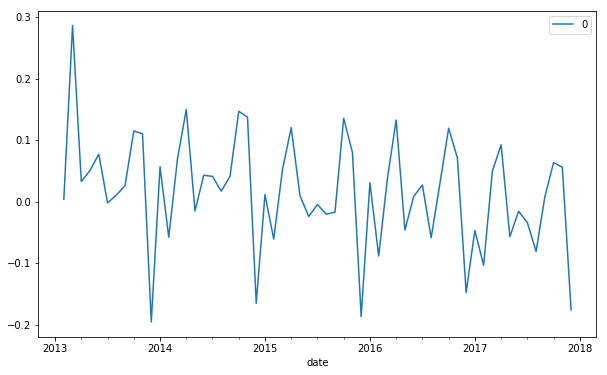

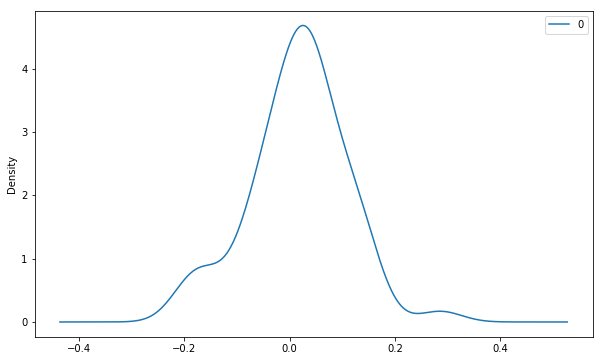

               0
count  59.000000
mean    0.016229
std     0.090952
min    -0.195437
25%    -0.028876
50%     0.026331
75%     0.066956
max     0.286619

The residual mean is centered at 0, so there is no bias in our prediction


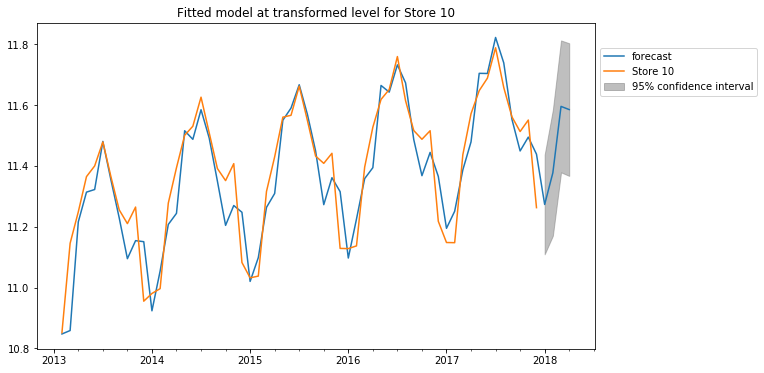

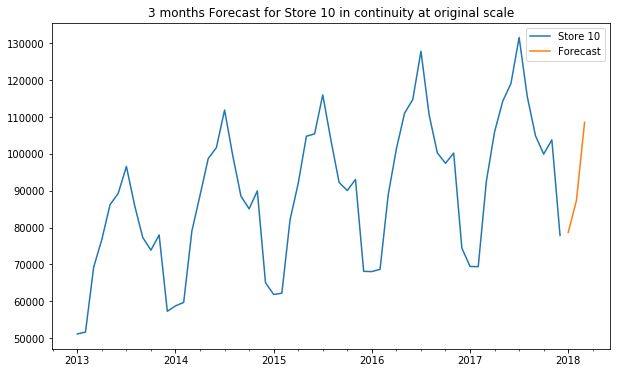

In [66]:
createModel(storeList[9])